# <center> Myzus 100G Population Genetics Workflow </center>

**Global patterns in genomic diversity reveal the molecular and ecological processes underpinning the evolution of insecticide resistance in the crop pest Myzus persicae**

Kumar Saurabh Singh<sup>1</sup>, Erick M. G. Cordeiro<sup>2</sup>, Bartlomiej J Troczka<sup>1</sup>, Adam Pym<sup>1</sup>, Joanna Mackisack<sup>1</sup>, Thomas C. Mathers<sup>3</sup>, Ana Duarte<sup>1#</sup>, Fabrice Legeai<sup>4</sup>, Stéphanie Robin<sup>4</sup>, Pablo Bielza<sup>5</sup>, Hannah J. Burrack<sup>6</sup>, Kamel Charaabi<sup>7</sup>, Ian Denholm<sup>8</sup>, Christian C. Figueroa<sup>9</sup>, Richard H. ffrench-Constant<sup>1</sup>, Georg Jander<sup>10</sup>, John T. Margaritopoulos<sup>11</sup>, Emanuele Mazzoni<sup>12</sup>, Ralf Nauen<sup>13</sup>, Claudio C. Ramírez<sup>9</sup>, Guangwei Ren<sup>14</sup>, Ilona Stepanyan<sup>15</sup>, Paul A. Umina<sup>16,17</sup>, Nina V. Voronova<sup>18</sup>, John Vontas<sup>19,20</sup>, Martin S. Williamson<sup>21</sup>, Alex C. C. Wilson<sup>22</sup>, Gao Xi-Wu<sup>23</sup>, Young-Nam Youn<sup>24</sup>, Christoph T. Zimmer<sup>1,b</sup>, Alex Hayward<sup>1</sup>, Jean-Christophe Simon<sup>4</sup>, Chris Bass<sup>1</sup>


**Abstract**
The aphid Myzus persicae is a destructive agricultural pest that displays an exceptional ability to develop resistance to both natural and synthetic insecticides. To investigate the evolution of resistance in this species we generated a chromosome-scale genome assembly and living panel of >110 fully sequenced globally sampled clonal lines. Our analyses reveal a remarkable diversity of resistance mutations segregating in global populations of M. persicae. We show that the emergence and spread of these mechanisms are influenced by host-plant associations, uncovering the widespread co‐option of a host-plant adaptation that also offers resistance against synthetic insecticides. We identify both the repeated evolution of independent resistance mutations at the same locus, and multiple instances of the evolution of novel resistance mechanisms against key insecticides. Our findings provide fundamental insights into the genomic responses of global insect populations to strong selective forces, and hold practical relevance for the control of pests and parasites.

## <center> 1. Quality control (filtering and prunning) </center>

For the population genetic analyses we will only use SNPs mapped to scafold 1 to 6, which are correct number of LD-groups for this species (i.e., number of chromosses). All the other contigs are small fragments of unmapped contigs. Quality control, missing data filtering, and pruning sites by linkage disequilibrium were performed in Plink and BCFtools in following steps:

   * **1-** Keep only scalfold from 1 to 6 and discarting smaller scafolds
   * **2-** Removing missing, keep only biallelic, remove markers with frequency less than 5%
   * **3-** Prune by linkage disequilibrium and Hardy-Weinberg Equilibrium (HWE) filtering for the neutral analyis

### 1.1 Scafold from 1 to 6

```
vcftools --vcf ./popgenome/vcf/MP100g.genotyped.SNPs.filtered.v2.vcf        \
         --chr 1 --chr 2 --chr 3 --chr 4 --chr 5 --chr 6                    \
         --recode --out MP100G_chr1-6                            
```

<font color='green'>After filtering, kept <b>128</b> out of <b>128</b> Individuals<font color='green'><br />
<font color='green'>After filtering, kept <b>3,500,575</b> out of a possible <b>3,690,397</b> Sites<font color='green'>

### 1.2 Renaming the samples

Second, we renamed the samples with a more easily recognizable clone name. 

```
bcftools reheader --samples clone_names.txt -o MP100G_chr1-6n.recode.vcf MP100G_chr1-6.recode.vcf
```

### 1.3 DP and GQ filterings

Next, we performed deep of coverage and quality filtering using DP (number of base calls aligned to a position and used in variant calling)and GQ(Genotype quality)VCF columns. Minimum deepth of coverage accepted was 3-fold and minimum genotype quality was 10.  

```
bcftools view  -i  'MIN(FMT/DP)>3 & MIN(FMT/GQ)>10' -o MP100G_chr1-6dp.recode.vcf MP100G_chr1-6n.recode.vcf
```

### 1.4 Removing missing, keep only biallelic, remove markers with frequency less than 5%


 * **--geno** option removes SNPs that have less than the specified call rate
 * **--maf** option can be used to remove SNPs with a MAF below a certain rate.

```
/home/erick/Programs/plink1.9/plink --vcf  MP100G_chr1-6dp.recode.vcf \
                                    --recode  vcf                    \
                                    --set-missing-var-ids @:#        \
                                    --geno 0                         \
                                    --maf 0.05                       \
                                    --threads 20                     \
                                    --biallelic-only                 \
                                    --out ./MP100G_chr1-6p        
```

<font color='green'>Total genotyping rate is <b>0.999748</b>.<font color='green'><br />
<font color='green'><b>14,102</b> variants removed due to missing genotype data (--geno).<font color='green'><br />
<font color='green'><b>489,498</b> variants removed due to minor allele threshold(s)<font color='green'><br />
<font color='green'><b>154,654</b> variants and <b>128</b> people pass filters and QC.<font color='green'>

### 1.5 Prune by linkage disequilibrium and HWE

* **--indep-pairwise** removal  each  SNP  that  has  an R<sup>2</sup> value  of greater  than  0.1  with  any  other  SNP  within  a  200-SNP  sliding  window  (advanced  by  50SNPs  each  time)
* **--hwe**
```
/home/erick/Programs/plink1.9/plink --vcf  MP100G_chr1-6p.vcf         \
                                    --recode  vcf                     \
                                    --set-missing-var-ids @:#         \
                                    --threads 20                      \
                                    --indep-pairwise 100 50 0.5       \
                                    --hwe 0.05                        \
                                    --out ./MP100G_chr1-6pn    
```

<font color='green'>--hwe: <b>28,705</b> variants removed due to Hardy-Weinberg exact test.<font color='green'><br />
<font color='green'><b>125,949</b> variants and <b>128</b> people pass filters and QC.<font color='green'><br />

### Pruning

<font color='green'><b>125,949</b> variants and <b>128</b> people pass filters and QC.<font color='green'><br />
<font color='green'>Pruned <b>14,865</b> variants from chromosome 1, leaving <b>12,440</b>.<font color='green'><br />
<font color='green'>Pruned <b>16,240</b> variants from chromosome 2, leaving <b>13,772</b>.<font color='green'><br />
<font color='green'>Pruned <b>12,658</b> variants from chromosome 3, leaving <b>11,922</b>.<font color='green'><br />
<font color='green'>Pruned <b>9,757</b> variants from chromosome 4, leaving <b>10,014</b>.<font color='green'><br />
<font color='green'>Pruned <b>6,052</b> variants from chromosome 5, leaving <b>6,130</b>.<font color='green'><br />
<font color='green'>Pruned <b>6,295</b> variants from chromosome 6, leaving <b>5,804</b>.<font color='green'><br />

    
<font color='green'>Pruning complete.  <b>65,867</b> of <b>125,949</b> variants removed.<font color='green'><br />

```
/home/erick/Programs/plink1.9/plink --vcf  MP100G_chr1-6pn.vcf         \
                                    --recode  vcf                     \
                                    --set-missing-var-ids @:#         \
                                    --threads 20                      \
                                    --extract plink.prune.in          \
                                    --out ./MP100G_chr1-6_prune    
```

<font color='green'><b>36,806</b> variants and <b>128</b> people pass filters and QC.<font color='green'>

## <center> 2. Setting up R enviroment </center>

### 2.1 Install required packages first

One of the reasons R has become popular is the colaborative aspect of the [CRAN](https://cran.r-project.org/) and [Bioconductor](https://www.bioconductor.org/) projects. Shortly, R packages are collections of functions and data sets developed by the community. To install a new package, you will need to use the **install.packages()** command. 

### 2.2. Update existing packages
It is considered good practice to keep R version and packages updated. **update.packages** update existing packages whereas **new.packages** looks for (suitable) packages on the repositories that are not already installed, and optionally offers them for installation.

In [1]:
#install.packages(pkgs=c("ape", "colorspace", "XML"),dependencies=TRUE)
#install.packages(pkgs=c("PBSmapping", "RgoogleMaps", "Rmpi", "foreign","mapproj", "maptools", "rgdal", "rgeos", "shapefiles", "snow", "sp","tripack"), dependencies=TRUE)
#install.packages(pkgs=c("ade4", "adegenet", "adephylo", "akima", "animation", "ape", "boot", "brew", "caTools", "caper", "cluster", "clusterGeneration", "coda", "colorspace", "combinat", "corrplot", "deSolve", "deldir", "devtools", "digest", "doParallel", "dplyr", "expm", "fastmatch", "fields", "foreach", "foreign", "gdata",
#"geiger", "ggplot2", "git2r", "gmodels", "gplots", "gtable", "gtools", "hierfstat", "httr", "igraph", "ips", "jsonlite", "KernSmooth", "lattice", "lazyeval", "LearnBayes", "magrittr", "mapdata", "mapplots", "mapproj", "maps", "maptools", "MASS", "Matrix", "memoise", "memuse", "mgcv", "mnormt", "msm", "mvtnorm", "ncbit", "nlme", "numDeriv", "PBSmapping", "pegas", "permute", "phangorn", "philentropy", "phylobase", "phytools", "picante", 
#"plotrix", "plyr", "png", "poppr", "RandomFields", "RandomFieldsUtils", "Rcpp", "reshape2", "rgdal", "rgeos", "RgoogleMaps", "rlang", "Rmpi", "rncl", "RNeXML", "rworldmap", "scales", "scatterplot3d", "segmented", "seqinr", "shapefiles", "shiny", "snow", "sos", "sp", "spData", "spam", "spdep", "StAMPP", "stringr", "subplex", "TeachingDemos", "tibble", "tidyr", "tripack", "vcfR", "vegan", "viridisLite","whisker", "withr", "XML"))
#devtools::install_github("bcm-uga/TESS3_encho_sen")


#update.packages(ask = FALSE)


### 2.3. Load existing packages

First, we need to prepare R enviroment loading all required libraries and setting working directory. **library("package Name", lib.loc = "path to library")** which loads packages, i.e. attaches them to the search list on your R workspace. [Adegenet](https://adegenet.r-forge.r-project.org/) is a package dedicated to the exploratory analysis of genetic data. It implements a set of tools ranging from multivariate methods to spatial genetics and genome-wise SNP data analysis. More information about Adegenet can be found at the [Adegenet repository](https://github.com/thibautjombart/adegenet) 

In [125]:
library("vcfR")
library("adegenet")
library("ape")
library("poppr")
library("pegas")
library("StAMPP")
library("hierfstat")
library("seqinr")
library("StAMPP")
library("dartR")
library("reshape2")
library("ggplot2")
library("coda")
library("igraph")
library("spdep")
library("RColorBrewer")
library("tidyr")
library("tess3r")

In [5]:
setwd("/media/erick/HDD2TB/Myzus_v2")
getwd()

[1] "/media/erick/HDD2TB/Myzus_v2"

## <center> 3. Data input, Quality control and visualization </center>

### 3.1. data input

The vcfR package is designed to work with data from VCF files. vcfR is fast and efficient dealing with large data sets. It also has many tool that aid visualization. As a rule of thumb, R does not perfomer well when memory use approaches 1 GB of RAM. 

The function **read.vcfR()** takes the filename you specify and reads it into R where it is stored as a vcfR object. Here we will create two objects, one called **Myzus** containing non-prune markers from the renamed vcf file and a second one called **Myzus.prune** that underwent quality control filtering and pruning in Plink.

In [4]:
Myzus       <- read.vcfR("MP100G_chr1-6dp.recode.vcf", verbose = FALSE)

In [7]:
Myzus.prune <- read.vcfR("MP100G_chr1-6_prune.vcf", verbose = FALSE)

* It returns object of class vcfR-class (i.e., S4 type object)
* Use the command **?read.vcfR** for more import options and further information
* The command **?pegas::read.vcf** returns list of objects loci and data.frame

In [6]:
Myzus
Myzus.prune

***** Object of Class vcfR *****
128 samples
6 CHROMs
663,252 variants
Object size: 1403.5 Mb
0 percent missing data
*****        *****         *****

***** Object of Class vcfR *****
128 samples
6 CHROMs
36,806 variants
Object size: 42.9 Mb
0 percent missing data
*****        *****         *****

<font color='green'> The un-prune file has <b>663,252</b> markers while the prune version has <b>36,806</b><font color='green'> 

In [7]:
Myzus@fix[1:10,1:5]

CHROM POS   ID REF ALT
 [1,] 1     8313  NA A   G  
 [2,] 1     22101 NA T   C  
 [3,] 1     22162 NA T   G  
 [4,] 1     22206 NA T   A  
 [5,] 1     44148 NA A   T  
 [6,] 1     44473 NA G   A  
 [7,] 1     45294 NA C   T  
 [8,] 1     45838 NA T   C  
 [9,] 1     46309 NA T   C  
[10,] 1     46361 NA A   T

### 3.2. Depth of Coverage VCF

We typically use 5x (or higher) as the cut-off in research settings. When we can tolerate more error, DP filter can be relaxed; however,  if our project in interested in clinical implication(s), then it is prudent to apply a more stringent filtering strategy. The mininum number of read is two for diploid organisms (i.e., 1 (homozygous) or 2 (heterozygous)) reads, although it not recommended to use filter 1 or 2x coverage, generally stablishing 3x as the minimum accepted.


The function **extract.gt** isolates elements from the 'gt' portion of vcf data. Fields available for extraction are listed in the FORMAT column of the 'gt' slot.

* Get information about depth of coverage (DP)
* Information of depth of coverage has the description of DP slot

In [8]:
strwrap(x=grep(pattern="ID=DP,", x=Myzus@meta, value=TRUE))

[1] "##FORMAT=<ID=DP,Number=1,Type=Integer,Description=\"Approximate read"
[2] "depth (reads with MQ=255 or with bad mates are filtered)\">"         
[3] "##INFO=<ID=DP,Number=1,Type=Integer,Description=\"Approximate read"  
[4] "depth; some reads may have been filtered\">"

In [9]:
Myzus.vcf.dp <- extract.gt(x=Myzus, element="DP",as.numeric=TRUE)

### 3.3. Visualize depth of Coverage

Now we can check the table containing converage information for each sample (DP). We can also visualize coverage using Boxplots.

In [10]:
dim(Myzus.vcf.dp)
head(Myzus.vcf.dp)

[1] 663252    128

USDA S105 S106 Clone1_O Clone2_O S116 S107 S108 S109 S110 ⋯ S91 S92 S93
1_8313   34  26    35  45       23        42   42   34  52   33   ⋯ 56  33  63 
1_22101 207  15    34  36       36       359  136   41  39   40   ⋯ 33  33  18 
1_22162 207  50   125  36       36       359   92  108  68   40   ⋯ 37  44  29 
1_22206 207  50    47  36       36       464   92  108  68   40   ⋯ 36  44  23 
1_44148  37  22    32  40       24        44   40   33  28   16   ⋯ 34  31  36 
1_44473  37  20    27  33       35        44   23   20  22   14   ⋯ 37  37  40 
        S94 S95 S96 S97 S98 S99 S9
1_8313  34  44  29  25   8  20  75
1_22101 36  16  22  28   7  18  33
1_22162 36  20  33  35   9  20  65
1_22206 53  17  31  30   6  22  41
1_44148 35  15  15  31   9  10  34
1_44473 36  18  11  41  10  12  40

In [ ]:
boxplot(x=Myzus.vcf.dp, col="#808080", ylab="Depth of coverage",las=3)
title("DP per specimen")
abline(h=seq(from=0, to=90, by=10), col="#b3b3b3")

<font color='green'>The heatmap is the best way to spot bad samples, in this case, TOPA10 and TOPA11. We can also visualize loci poorly represented across samples<font color='green'>

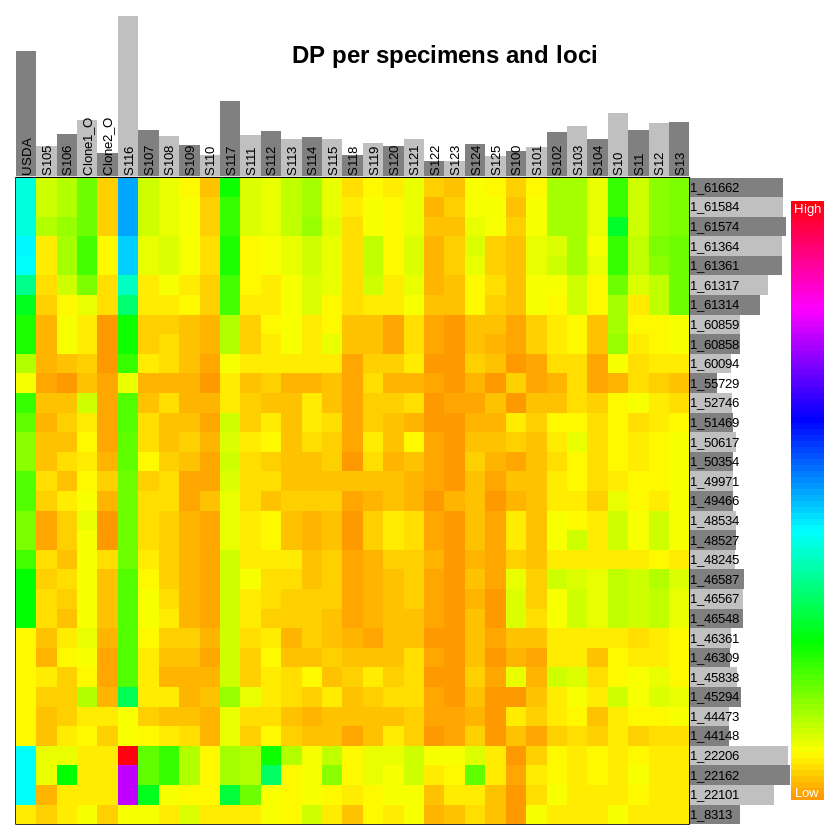

In [11]:
heatmap.bp(x=Myzus.vcf.dp[1:33,1:33], col.ramp=rainbow(n=100,
                  start=0.1)) # Subset - only first 100 loci and individuals
                  title("DP per specimens and loci")

## <center> 4. Convert to the proper format </center>

### 4.1. Convert to *genind*

The objects of class genind contain individual genotypes. **tab** matrix of genotypes, in rows, for all alleles, in columns. Values are frequency: '0' if the genotype does not have the corresponding allele, '1' for an homozygote and 0.5 for an heterozygte. Rows and columns are given generic names.

We can extract information such as **pop.nall** (number of alleles per population), **NA.perc** percentage of  issing data, **Hobs** observed heterozygosity, **Hexp** expected heterozygosity for the genind object.

In [8]:
# Genind
Myzus.genind <- vcfR2genind(x=Myzus.prune)

In [13]:
Myzus.genind

/// GENIND OBJECT /////////

 // 128 individuals; 36,806 loci; 73,612 alleles; size: 55.5 Mb

 // Basic content
   @tab:  128 x 73612 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 73612 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: adegenet::df2genind(X = t(x), sep = sep)

 // Optional content
   - empty -

In [14]:
nInd(Myzus.genind)
indNames(Myzus.genind)
nLoc(Myzus.genind)
head(locNames(Myzus.genind))

[1] 128

[1] "USDA_USDA" "S105_S105" "S106_S106" "Clone1_O"  "Clone2_O"  "S116_S116"
  [7] "S107_S107" "S108_S108" "S109_S109" "S110_S110" "S117_S117" "S111_S111"
 [13] "S112_S112" "S113_S113" "S114_S114" "S115_S115" "S118_S118" "S119_S119"
 [19] "S120_S120" "S121_S121" "S122_S122" "S123_S123" "S124_S124" "S125_S125"
 [25] "S100_S100" "S101_S101" "S102_S102" "S103_S103" "S104_S104" "S10_S10"  
 [31] "S11_S11"   "S12_S12"   "S13_S13"   "S14_S14"   "S15_S15"   "S16_S16"  
 [37] "S17_S17"   "S18_S18"   "S19_S19"   "S1_S1"     "S20_S20"   "S21_S21"  
 [43] "S22_S22"   "S23_S23"   "S24_S24"   "S25_S25"   "S26_S26"   "S27_S27"  
 [49] "S28_S28"   "S29_S29"   "S2_S2"     "S30_S30"   "S31_S31"   "S32_S32"  
 [55] "S33_S33"   "S34_S34"   "S35_S35"   "S36_S36"   "S37_S37"   "S38_S38"  
 [61] "S39_S39"   "S3_S3"     "S40_S40"   "S41_S41"   "S42_S42"   "S43_S43"  
 [67] "S44_S44"   "S45_S45"   "S46_S46"   "S47_S47"   "S48_S48"   "S49_S49"  
 [73] "S4_S4"     "S50_S50"   "S51_S51"   "S52_S52"   "S53_S53"   "S54_S54"  
 [79] "S55_S55"   "S56_S56"   "S57_S57"   "S58_S58"   "S59_S59"   "S5_S5"    
 [85] "S60_S60"   "S61_S61"   "S62_S62"   "S63_S63"   "S64_S64"   "S65_S65"  
 [91] "S66_S66"   "S67_S67"   "S68_S68"   "S69_S69"   "S6_S6"     "S70_S70"  
 [97] "S71_S71"   "S72_S72"   "S73_S73"   "S74_S74"   "S75_S75"   "S76_S76"  
[103] "S77_S77"   "S78_S78"   "S79_S79"   "S7_S7"     "S80_S80"   "S81_S81"  
[109] "S82_S82"   "S83_S83"   "S84_S84"   "S85_S85"   "S86_S86"   "S87_S87"  
[115] "S88_S88"   "S89_S89"   "S8_S8"     "S90_S90"   "S91_S91"   "S92_S92"  
[121] "S93_S93"   "S94_S94"   "S95_S95"   "S96_S96"   "S97_S97"   "S98_S98"  
[127] "S99_S99"   "S9_S9"

[1] 36806

[1] "1:8313"  "1:45838" "1:50354" "1:61662" "1:70387" "1:73057"

We can include the information of the sample location (i.e., "putative populations") including it in separated slops of the genind file. **pop** slot will contain factor giving the population of each individual and **pop.names** is a vector giving the real names of the populations.

In [9]:
popmap <- read.table("./popmap.txt", header = FALSE, sep = "", dec = ".")
pop(Myzus.genind)<- as.factor(t(popmap))
#tail(popmap)

### 4.2. Convert to *genlight*


The class genlight is also S4 class for storing a genotypes of binary SNPs in a compact way. This format is preferable for larger dataset. genlight suitable for huge data, not required now. On Linux/Mac we can use the **n.cores** option to engage more cores for the processing

In [10]:
Myzus.genlight <- vcfR2genlight(x=Myzus.prune, n.cores=10)
Myzus.genlight 

 /// GENLIGHT OBJECT /////////

 // 128 genotypes,  36,806 binary SNPs, size: 4.1 Mb
 0 (0 %) missing data

 // Basic content
   @gen: list of 128 SNPbin

 // Optional content
   @ind.names:  128 individual labels
   @loc.names:  36806 locus labels
   @chromosome: factor storing chromosomes of the SNPs
   @position: integer storing positions of the SNPs
   @other: a list containing: elements without names 


**We can explore pattern of missing data in larger dataset using genlight files**

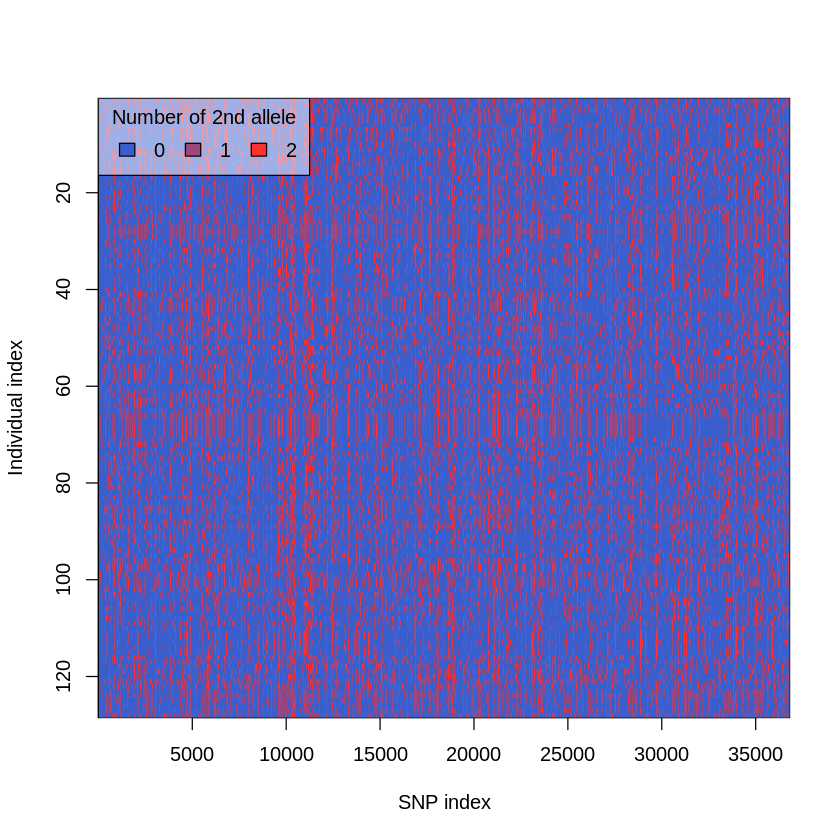

In [20]:
# Plot of missing data (white) and number of 2nd alleles
glPlot(x=Myzus.genlight, legend=TRUE, posi="topleft")

The plot above displays the SNP data as image, representing numbers of second alleles using colours.

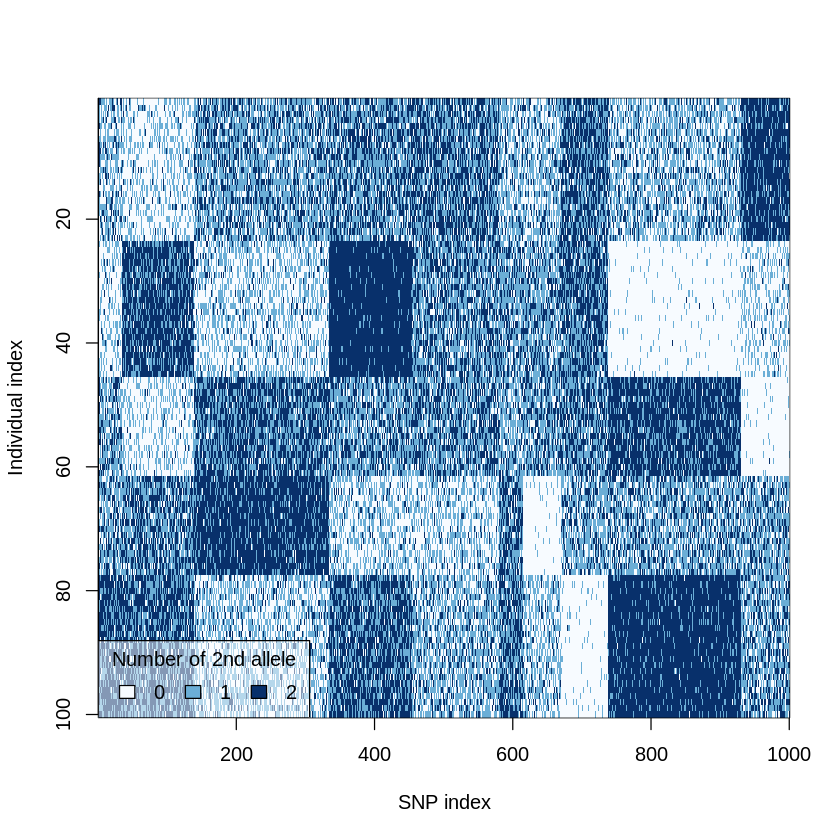

In [21]:
x <- glSim(100, 1000, k=5, block.maxsize=200, ploidy=2, sort.pop=TRUE)
glPlot(x, col=bluepal(3))

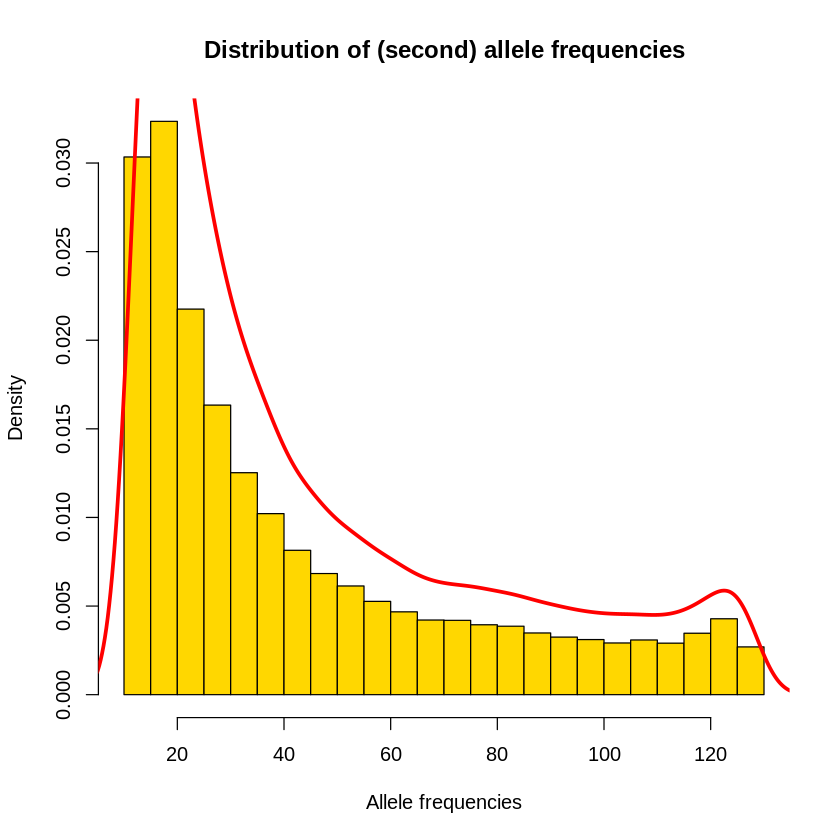

In [23]:
# Sum of the number of second allele in each SNP
Myzus.freq <- glSum(Myzus.genlight)

# Plot distribution of (second) allele frequencies
hist(x=Myzus.freq, proba=TRUE, col="gold", xlab="Allele frequencies", main="Distribution of (second) allele frequencies")
lines(x=density(Myzus.freq)$x, y=density(Myzus.freq)$y*1.5, col="red", lwd=3 )

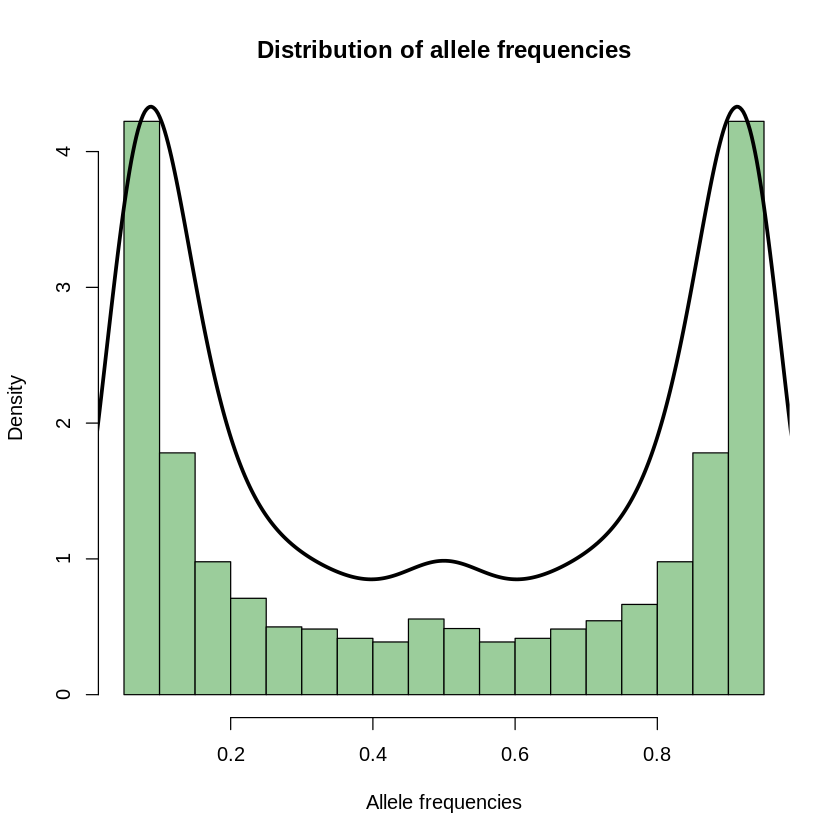

In [24]:
# Mean number of second allele in each SNP
Myzus.mean <- glMean(Myzus.genlight)
Myzus.mean <- c(Myzus.mean , 1- Myzus.mean)

# Plot distribution of allele frequencies
hist(x=Myzus.mean, proba=TRUE, col="darkseagreen3",
xlab="Allele frequencies", main="Distribution of allele frequencies", nclass=20)
lines(x=density(Myzus.mean, bw=0.05)$x, y=density(Myzus.mean, bw=0.05)$y*2, lwd=3)

<font color='green'>Because I have filtered nonbiallelic loci out, all  polymorphic  loci  are  biallelic as expected.<font color='green'>

<font color='green'>Large  number  of  loci  are  nearly  fixed or nearly lost (frequencies  close  to  0  or  1).<font color='green'> 

In [33]:
temp <- temp[-1]
temp <- 100*temp/sum(temp)
round(temp,1)

numeric(0)

## <center> 5. Descriptive statistics and genetic diversity </center>

#### Allele frequencies
Relative frequency of an allele (variant of a gene) at a particular locus in a population, expressed as a fraction or percentage.

$$f(A_1)=p_j=\frac{nA_1}{2N}$$  and $$f(A_2)=q_j= 1−p_j$$

#### Minor allele frequency
Minor allele frequency refers to the frequency at which the second most common allele occurs in a given population. Minor allele frequency is widely used in population genetics studies because it provides information to differentiate between common and rare variants in the population. 

$$maf=min(p_j,q_j)$$

#### Observed heterozygosity

$$H_o=\frac{nH_j}{N}$$


#### Expected heterozygosity

$$H_e=2p_jq_j$$


#### Nei’s genetic diversity

$$DG=1−p_j^2 − q_j^2$$


#### Polymorphic information content

$$PIC=1−(p_j^2+q_j^2)−(2p_j^2q_j^2)$$


#### Missing rate

$$H_o=\frac{nNA_j}{N}$$


#### Hardy-Weinberg equilibrium statistic

$$χ^2=\frac{1}{d}\sum_{k=1}^3{\frac{(O_k−E_k)^2}{E_k}}$$



#### Observed heterozygosity

$$H_{oi}=\frac{nH_i}{m}$$

#### Inbreeding coefficient

$$F_i=\frac{O(H_i)−E(H)}{m−E(H)}$$

where $nH_i$ is the number of heterozigous genotypes (of type $A_1A_2$ or $A_2A_1$) in the individual i, m is the number of markers, $O(H_i)$ is the observed homozygosity for individual $i$, $E(H)=∑j_1 − 2p_j(1−p_j)$ is the expected homozygosity across all snps.


#### Effective populational size

$$Ne= \left( \frac{1}{2\bar F_i} \right) N$$

* Descriptive  I
* Get summary - names and sizes of populations, heterozygosity, some info about loci

In [34]:
Myzus.summ <- summary(Myzus.genind)

* Plot expected vs. observed heterozygosity

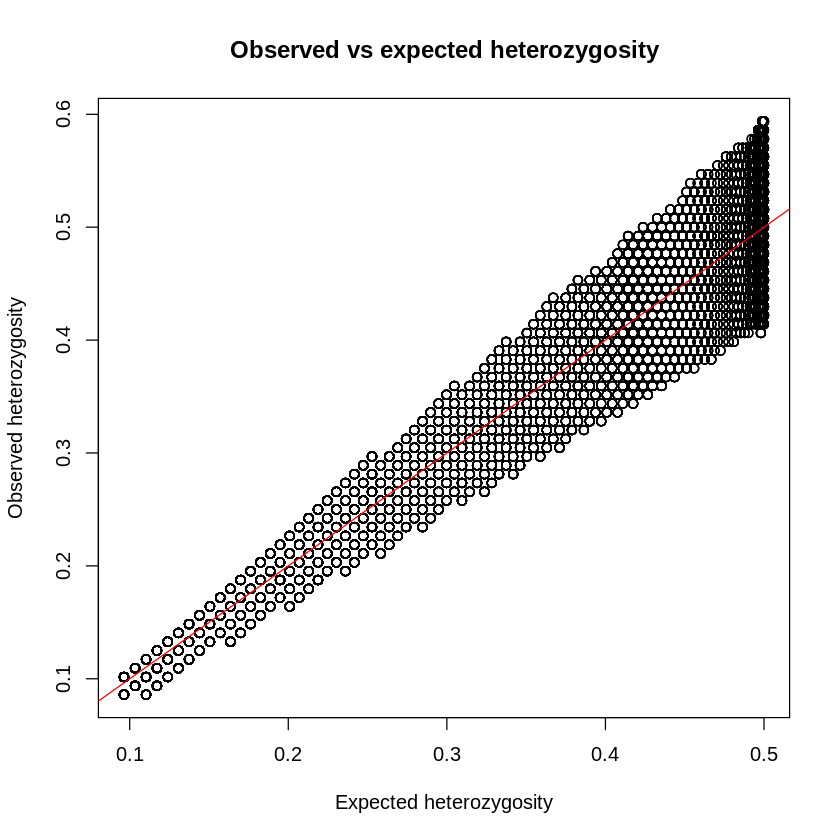

In [35]:
plot(x=Myzus.summ$Hexp, y=Myzus.summ$Hobs,
       main="Observed vs expected heterozygosity",
       xlab="Expected heterozygosity", ylab="Observed heterozygosity")
       abline(0, 1, col="red")

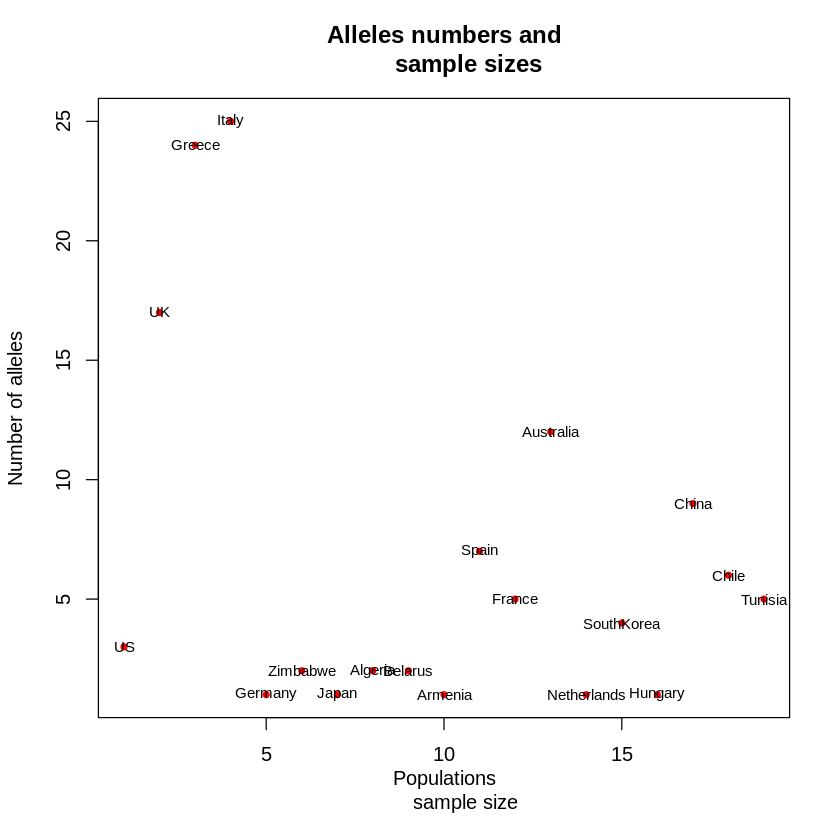

In [55]:
# Create pane with some information
#par(mfrow=c(2, 2)) # Divide graphical devices into 4 smaller spaces
# Plot alleles number vs. population sizes
plot(x=Myzus.summ$n.by.pop, y=Myzus.summ$pop.nall, xlab="Populations
       sample size", ylab="Number of alleles", main="Alleles numbers and
       sample sizes", col="red", pch=20)
#barplot(height=Myzus.summ$pop.nall, names=as.factor(Myzus.summ$n.by.pop), col=rgb(0.2,0.4,))

# Add text description to the point
text(x=Myzus.summ$n.by.pop, y=Myzus.summ$pop.nall,
       lab=names(Myzus.summ$n.by.pop), offset = 15, cex=0.75)


In [95]:
# Barplots of various data
#barplot(height=Myzus.summ$Hexp - Myzus.summ$Hobs, main="Heterozygosity:
#           expected-observed", ylab="Hexp - Hobs", las=3)

#barplot(height=Myzus.summ["n.by.pop"], main="Sample sizes per
#           population", ylab="Number of genotypes", las=3)

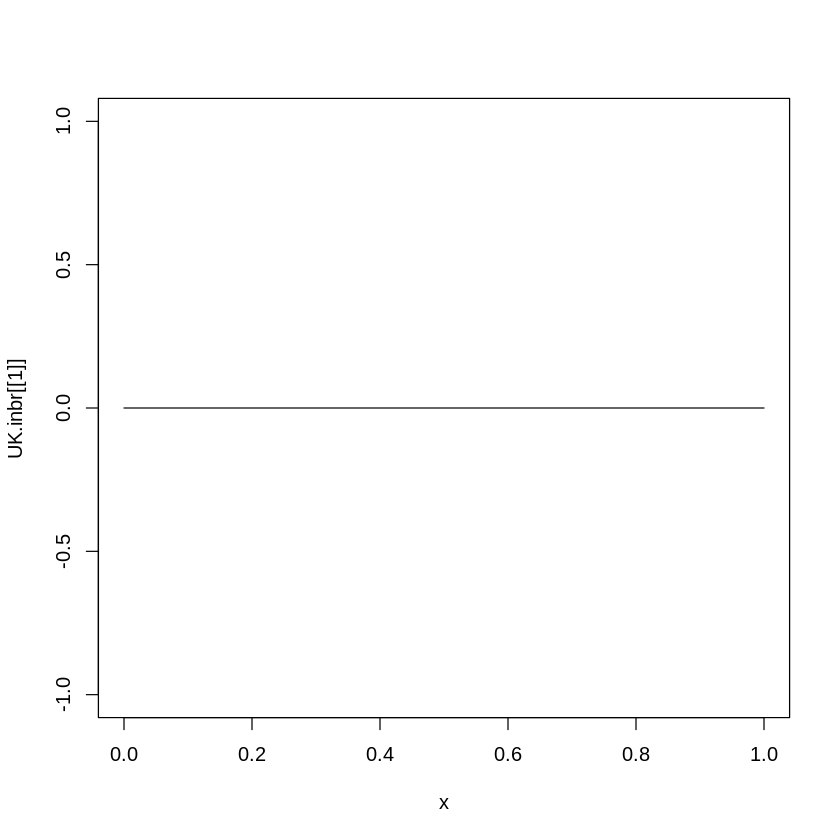

In [50]:
# Calculate the inbreeding

Myzus.pops.US <- seppop(Myzus.genind)[["US"]]
Myzus.pops.Italy <- seppop(Myzus.genind)[["Italy"]]
Myzus.pops.UK <- seppop(Myzus.genind)[["UK"]]


#US.inbr <- inbreeding(x= Myzus.pops.US, N=100)
UK.inbr <- inbreeding(Myzus.pops.UK, res.type="function")
plot(UK.inbr [[1]]) 

In [51]:
x <- seq(0,1,le=1000)
mySamp <- sample(x, 100, prob=UK.inbr[[1]](x)*1e250, replace=TRUE)
mean(mySamp)
hist(mySamp, xlim=c(0,1))

ERROR: Error in sample.int(length(x), size, replace, prob): too few positive probabilities


## <center> Geneflow and population genetic structure </center>

* Simple PCA
* Impute missing data using averages

In [11]:
X <- tab(Myzus.genind, NA.method="mean") 

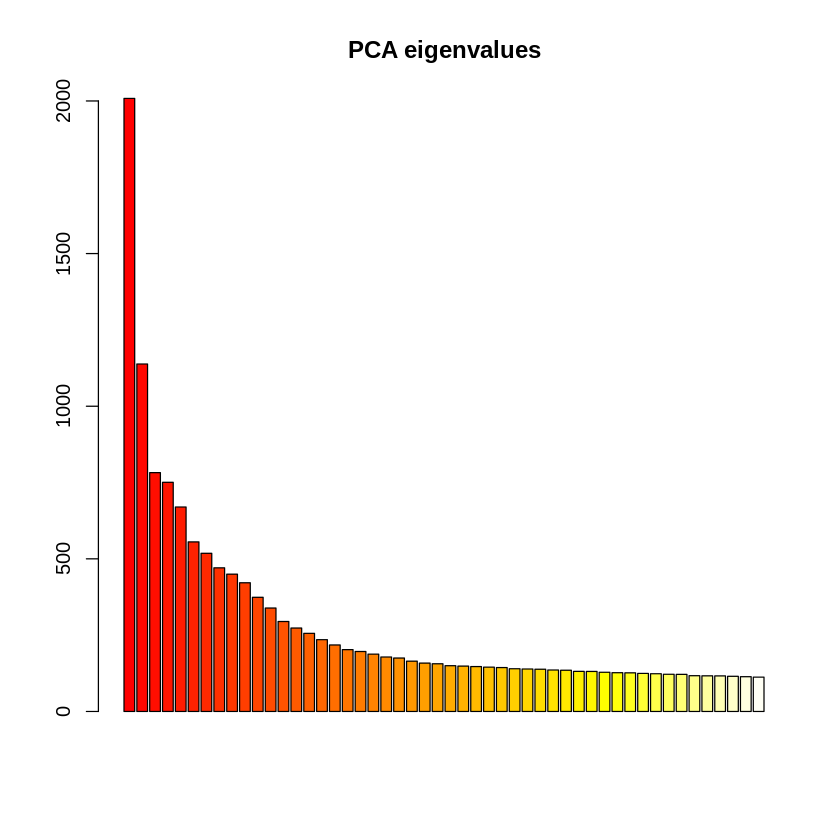

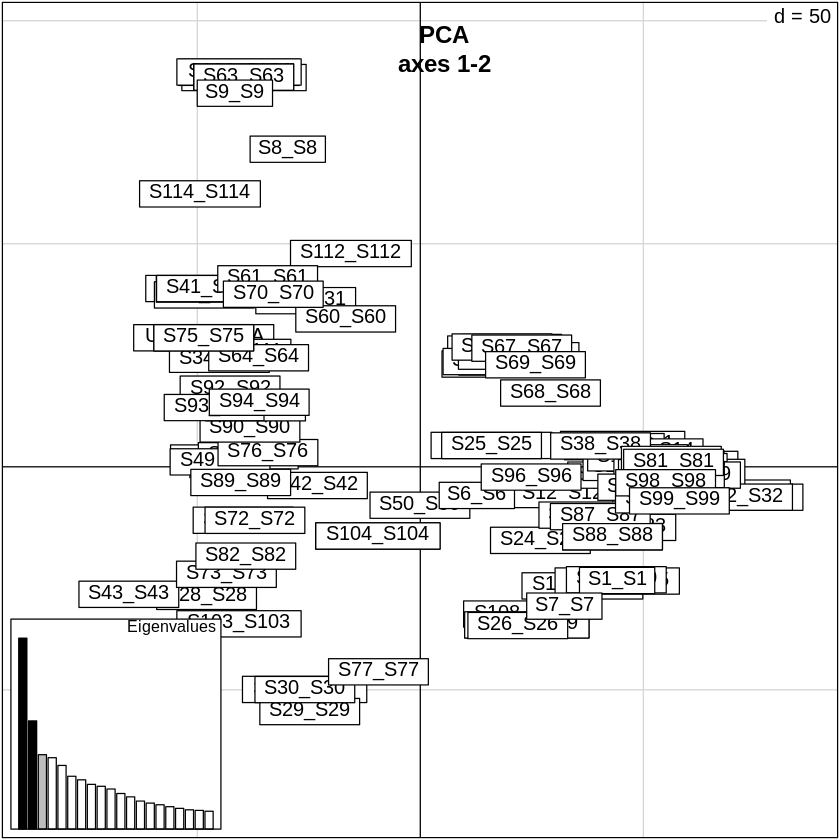

In [13]:
pca1 <- dudi.pca(X,scannf=FALSE,scale=FALSE)
temp <- as.integer(pop(Myzus.genind))
myCol <- transp(rainbow(16),.8)[temp]
#plot(pca1$li, col=myCol, cex=3, pch=16)
barplot(pca1$eig[1:50],main="PCA eigenvalues", col=heat.colors(50))

s.label(pca1$li)
title("PCA\naxes 1-2")
add.scatter.eig(pca1$eig[1:20], 3,1,2)

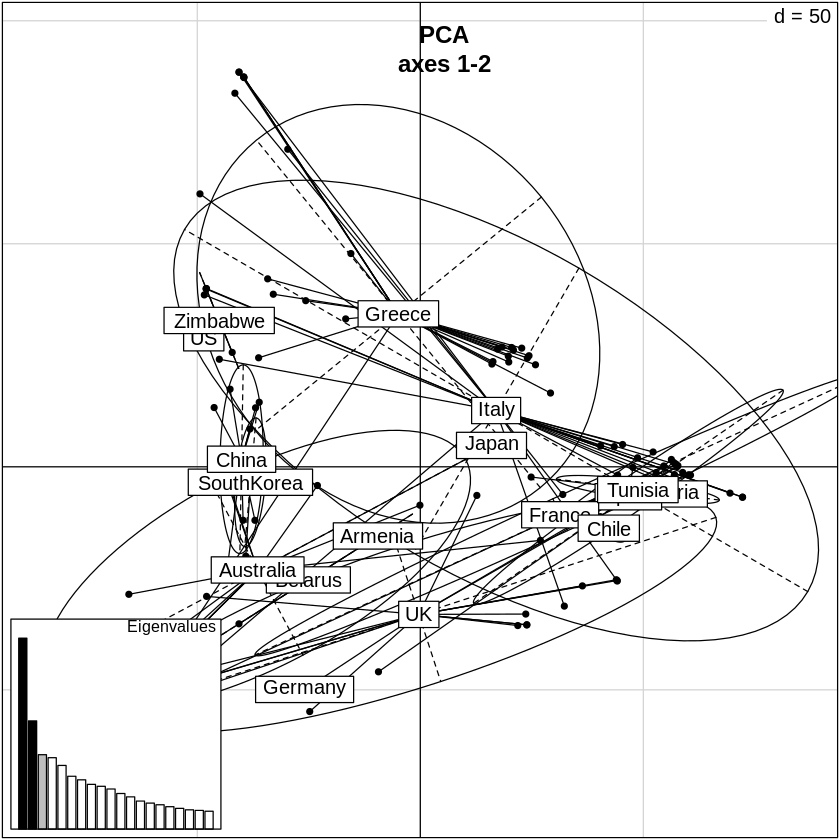

In [15]:
s.class(pca1$li, pop(Myzus.genind))
title("PCA\naxes 1-2")
add.scatter.eig(pca1$eig[1:20], 3,1,2)

[1] 11.008628  6.239409  4.288753  4.114865  3.671442  3.045060

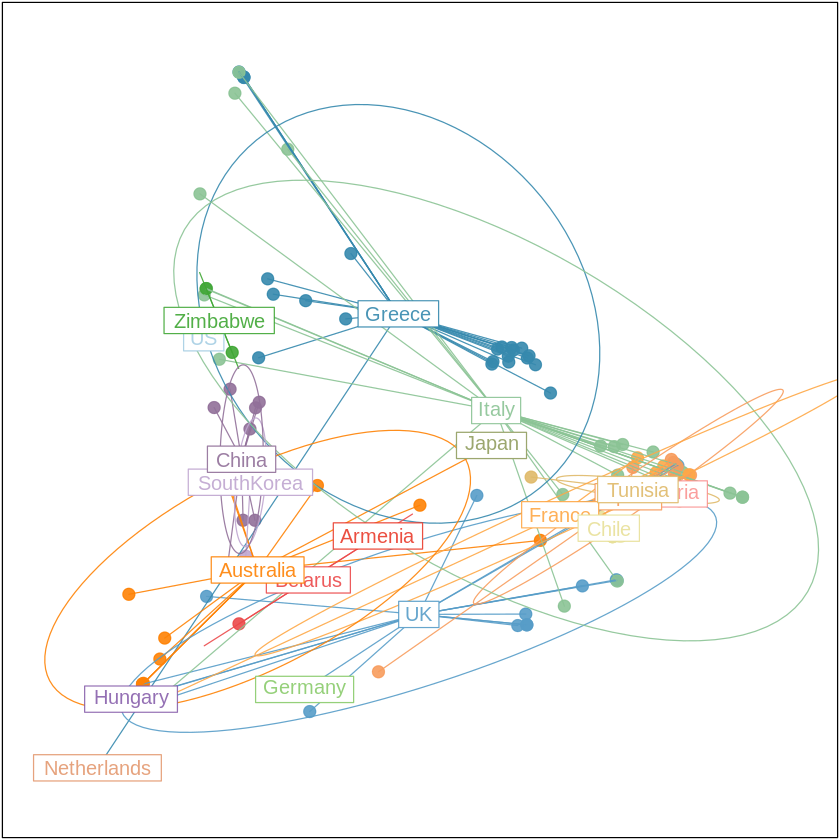

In [96]:
col <- funky(20)
s.class(pca1$li, pop(Myzus.genind), col=transp(col,.9), axesell=FALSE,cstar=0, cpoint=2, grid=FALSE, addaxes = FALSE)


eig.perc <- 100*pca1$eig/sum(pca1$eig)
head(eig.perc)

## PCoA

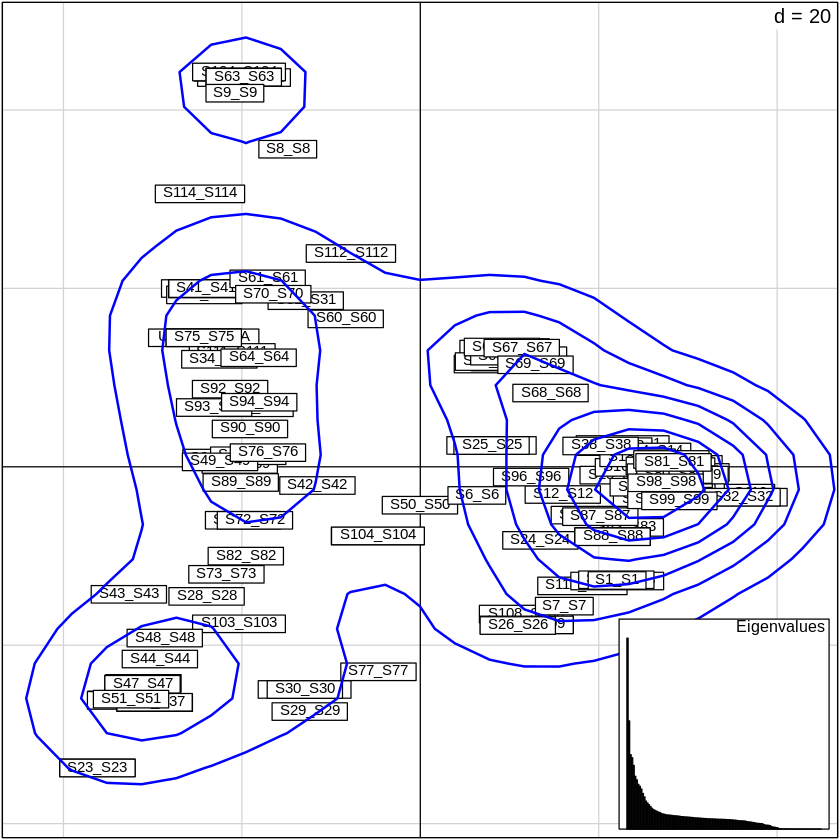

In [19]:
Myzus.pcoa <- dudi.pco(d=dist(x=scaleGen(x=Myzus.genind, center=TRUE, scale=FALSE, truenames=TRUE), method="euclidean"), scannf=FALSE, nf=3)

# Basic display
s.label(dfxy=Myzus.pcoa$li, clabel=0.75)

# Add kernel density
s.kde2d(dfxy=Myzus.pcoa$li, cpoint=0, add.plot=TRUE)

# Add histogram of Eigenvalues
add.scatter.eig(w=Myzus.pcoa$eig, nf=3, xax=1, yax=2, posi="bottomright", sub="Eigenvalues")

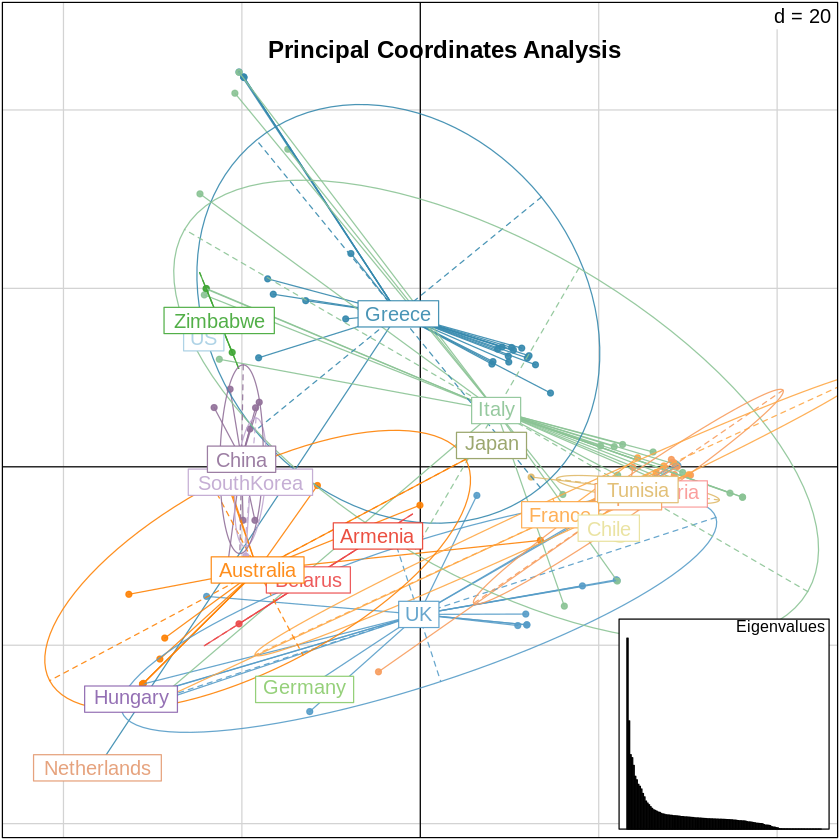

In [21]:
# Colored display according to populations
# Creates vector of colors according to populations
Myzus.pcoa.col <- rainbow(18)[as.integer(pop(Myzus.genind))]

col <- funky(20)
s.class(Myzus.pcoa$li, pop(Myzus.genind), col=transp(col,.9))


add.scatter.eig(w=Myzus.pcoa$eig, nf=3, xax=1, yax=2, posi="bottomright", sub="Eigenvalues")
title("Principal Coordinates Analysis") # Adds title to the graph

## DAPC

Retain all informative PC (here about 85)
According to second graph select best K (here 2)
Now we select K=2

Choose the number PCs to retain (>= 1): 

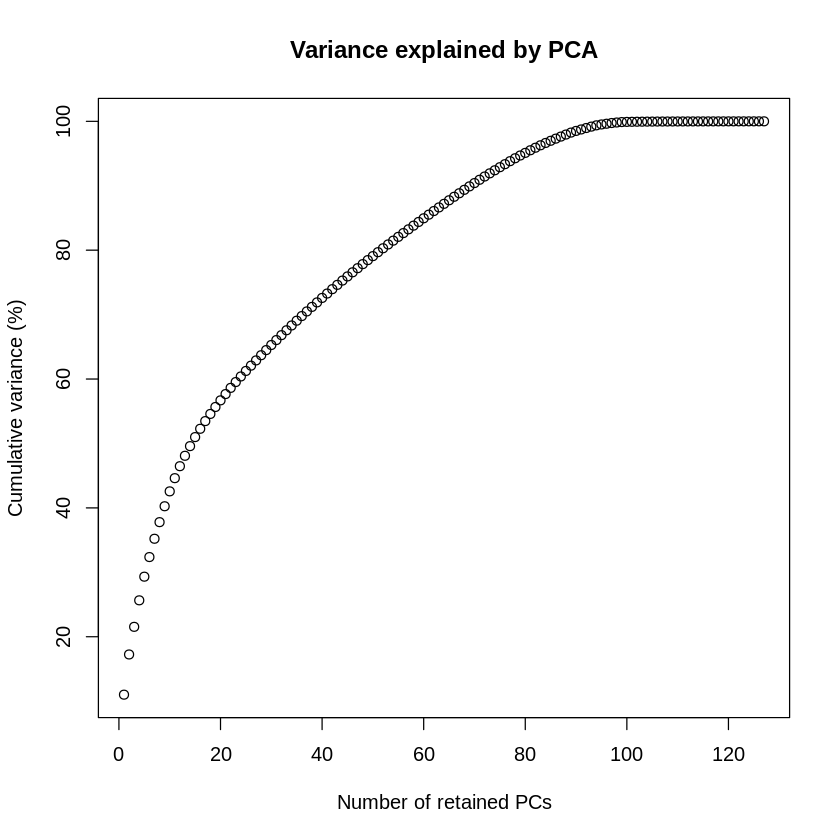

Choose the number of clusters (>=2): 

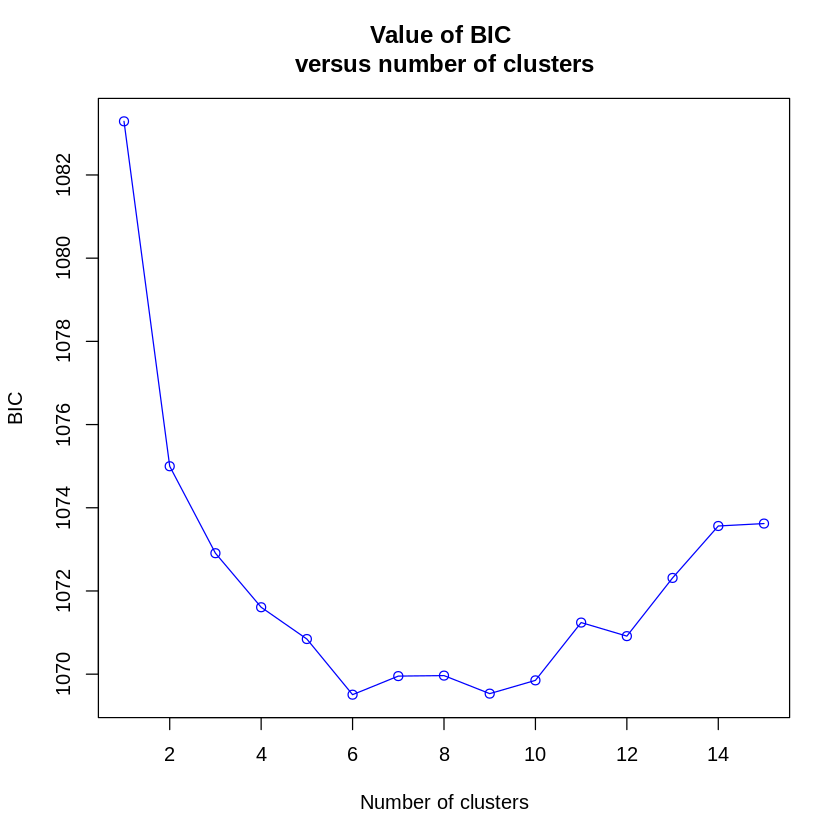

In [25]:
Myzus.kfind <- find.clusters(x=Myzus.genind, stat="BIC",
choose.n.clust=80, max.n.clust=15, n.iter=100000, n.start=100, scale=FALSE, truenames=TRUE)

In [26]:
# See results as text
table(pop(Myzus.genind), Myzus.kfind$grp)

             
               1
  US           3
  UK          17
  Greece      24
  Italy       25
  Germany      1
  Zimbabwe     2
  Japan        1
  Algeria      2
  Belarus      2
  Armenia      1
  Spain        7
  France       5
  Australia   12
  Netherlands  1
  SouthKorea   4
  Hungary      1
  China        9
  Chile        6
  Tunisia      5

In [32]:
Myzus.kfind$size

[1] 128

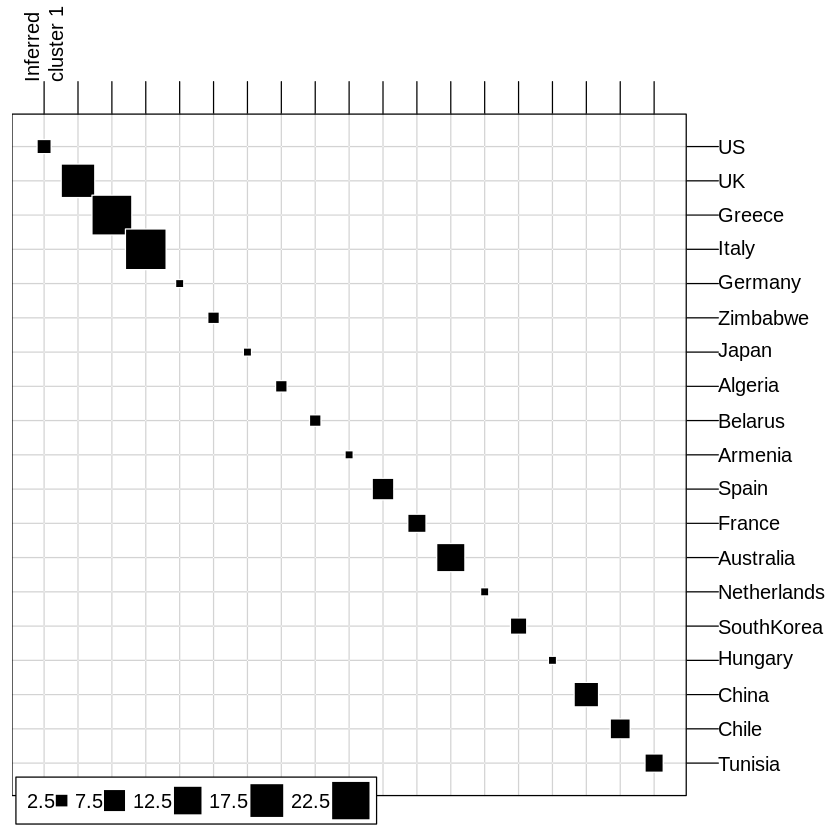

In [27]:
# Graph showing table of original and inferred populations and
# assignment of individuals
table.value(df=table(pop(Myzus.genind), pop(Myzus.genind)), 
            col.lab= paste("Inferred\ncluster", 1:length(Myzus.kfind$size)), grid=TRUE)

Choose the number PCs to retain (>=1): 

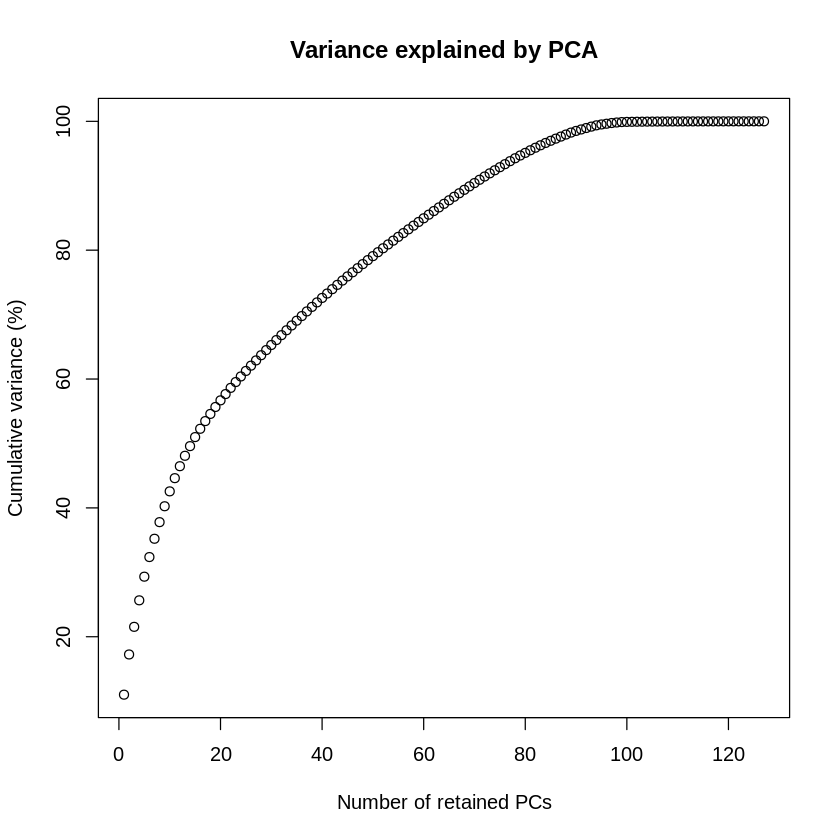

In [28]:
## K=2
# Create DAPC
# Number of informative PC (Here 15, adegenet recommends < N/3). Select
# number of informative DA (here only one is available - no PCA graph)
Myzus.dapc <- dapc(x=Myzus.genind, pop = pop(Myzus.genind), n.da =9)

In [38]:
Myzus.dapc <- dapc(Myzus.genind, n.pca = 9, n.da = 2)

Warning message in brewer.pal(n = nPop(Myzus.genind), name = "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


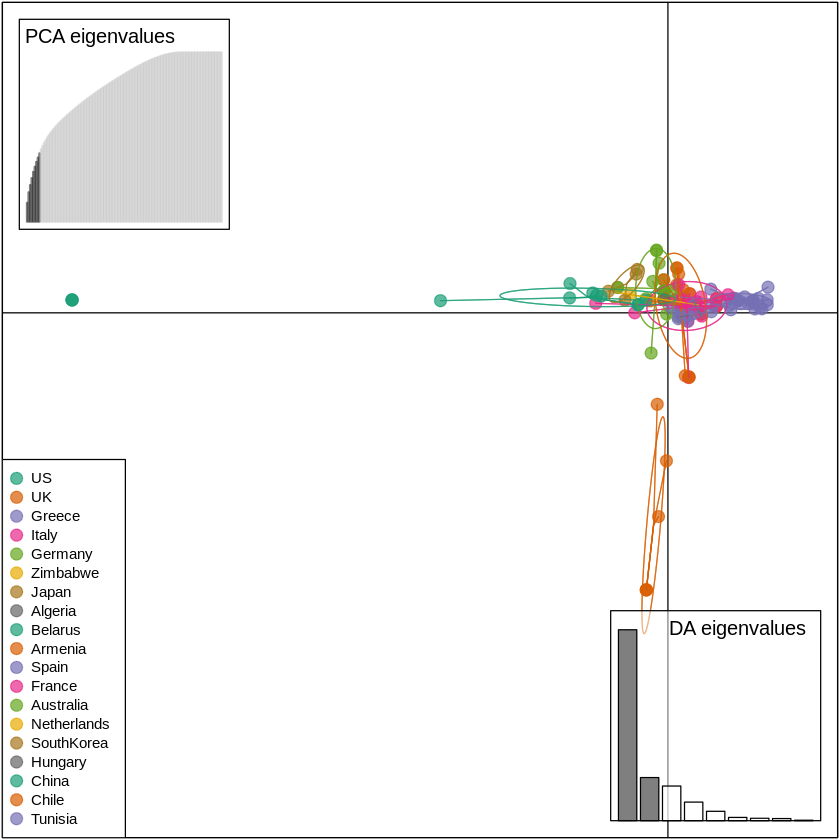

In [44]:
cols <- brewer.pal(n = nPop(Myzus.genind), name = "Dark2")
scatter(Myzus.dapc, col = cols, cex = 2, legend = TRUE, clabel = F, posi.leg = "bottomleft", scree.pca = TRUE,
        posi.pca = "topleft", cleg = 0.75)

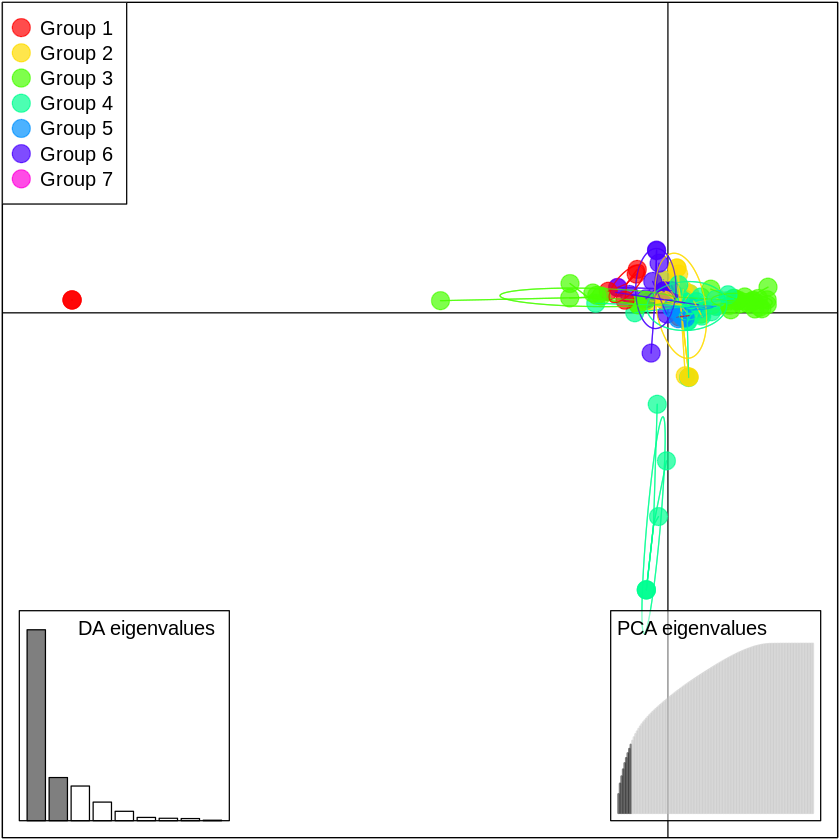

In [114]:
scatter(x=Myzus.dapc, main="DAPC, Myzus persicae",
           bg="white", cex=3, clab=0, col=rainbow(7), posi.da="bottomleft",
           scree.pca=TRUE, posi.pca="bottomright", leg=TRUE,
           txt.leg=c("Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6", "Group 7"), 
           posi.leg="topleft")

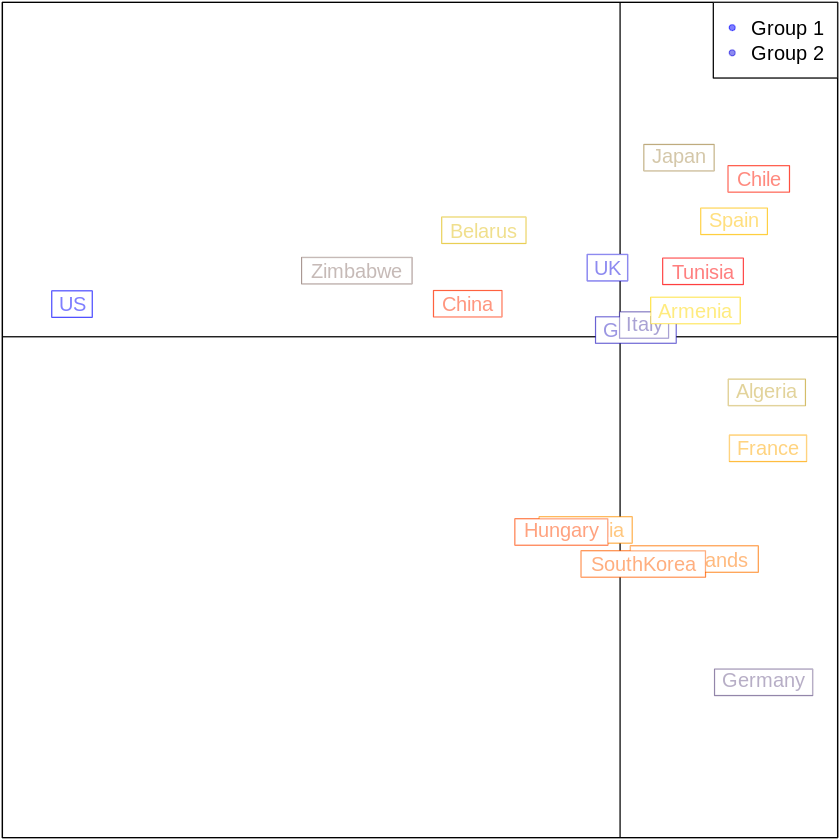

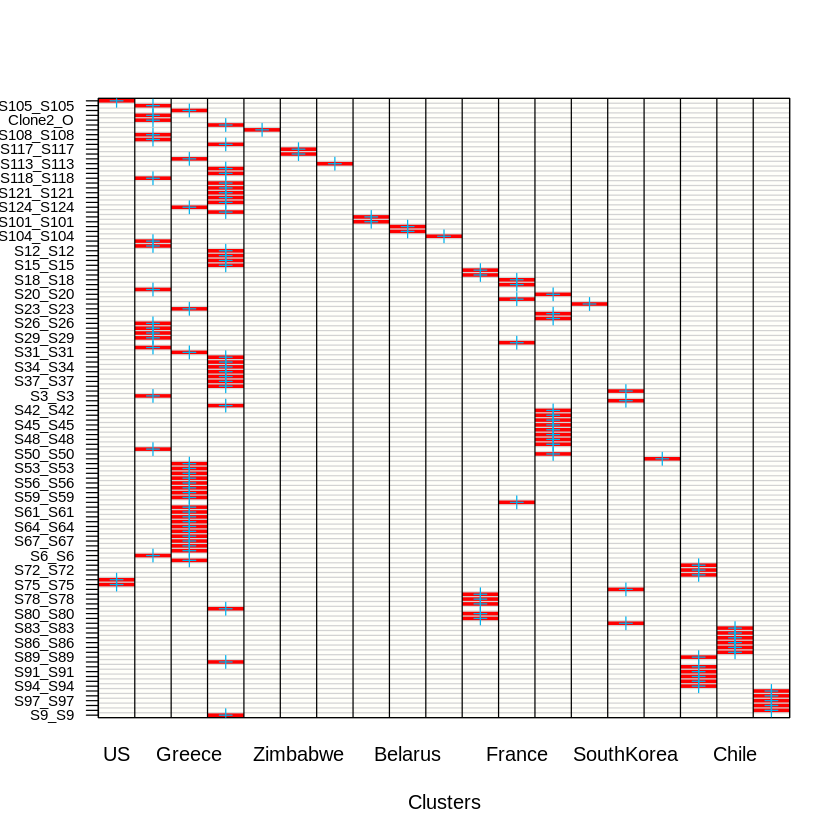

In [30]:
# Density function 
scatter(x=Myzus.dapc, main="DAPC", bg="white", solid=0.5, scree.da=FALSE,
leg=TRUE, txt.leg=c("Group 1", "Group 2"), posi.leg="topright")

# Assignment of individuals to clusters
assignplot(x=Myzus.dapc)

Warning message in .palette_parser(col.pal, ncol(x), txt.leg):
“insufficient color palette supplied. Using funky().”


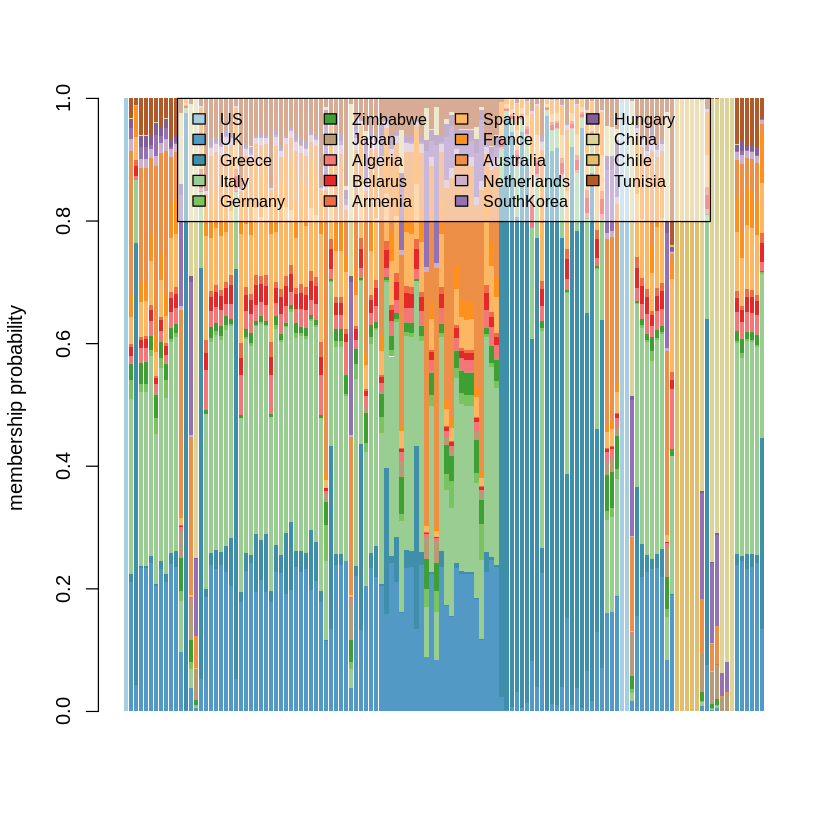

In [45]:
#compoplot(pnw.dapc,col = function(x) cols, posi = 'top')
compoplot(Myzus.dapc,col = cols, posi = 'top')

In [98]:
dapc.results <- as.data.frame(Myzus.dapc$posterior)
dapc.results$pop <- pop(Myzus.genind)
dapc.results$indNames <- rownames(dapc.results)

In [99]:
# library(reshape2)
# dapc.results <- melt(dapc.results)

dapc.results <- pivot_longer(dapc.results, -c(pop, indNames))

In [52]:
head(dapc.results, n = 5)

Original_Pop Sample    Assigned_Pop Posterior_membership_probability
1 US           USDA_USDA US            1.000000e+00                   
2 US           USDA_USDA UK           2.178385e-126                   
3 US           USDA_USDA Greece       7.779534e-153                   
4 US           USDA_USDA Italy        9.295992e-129                   
5 US           USDA_USDA Germany      9.915182e-121

In [53]:
colnames(dapc.results) <- c("Original_Pop","Sample","Assigned_Pop","Posterior_membership_probability")

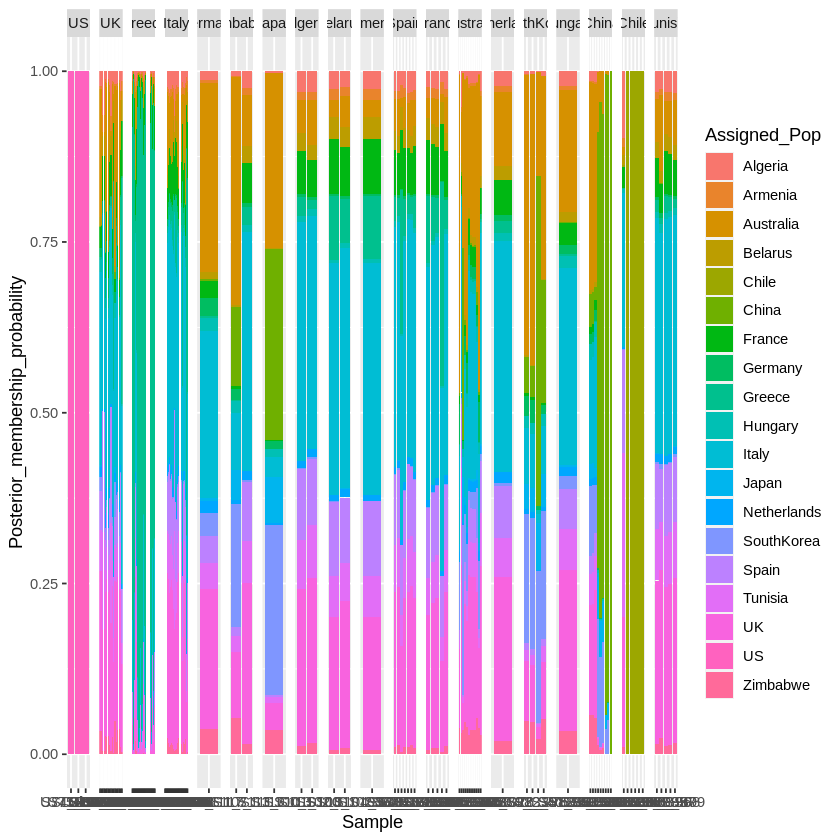

In [59]:
p <- ggplot(dapc.results, aes(x=Sample, y=Posterior_membership_probability, fill=Assigned_Pop))
p <- p + geom_bar(stat='identity') 
#p <- p + scale_fill_manual(values = cols) 
p <- p + facet_grid(~Original_Pop, scales = "free")
#p <- p + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 9))
p

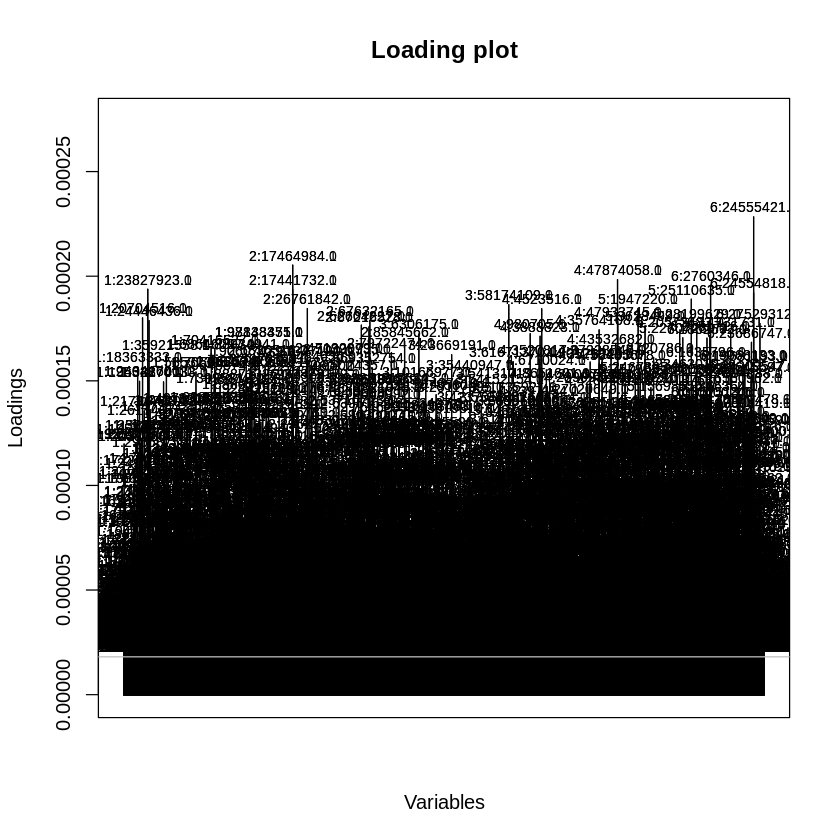

In [101]:
# Loadingplot - alleles the most adding to separation of individuals
loadingplot(x=Myzus.dapc$var.contr)

## Phylogeny trees

In [33]:
X <- scaleGen(Myzus.genind, NA.method="mean")
D <- dist(X)
tre <- nj(D)
myCol=rainbow(20)[as.integer(pop(Myzus.genind))]

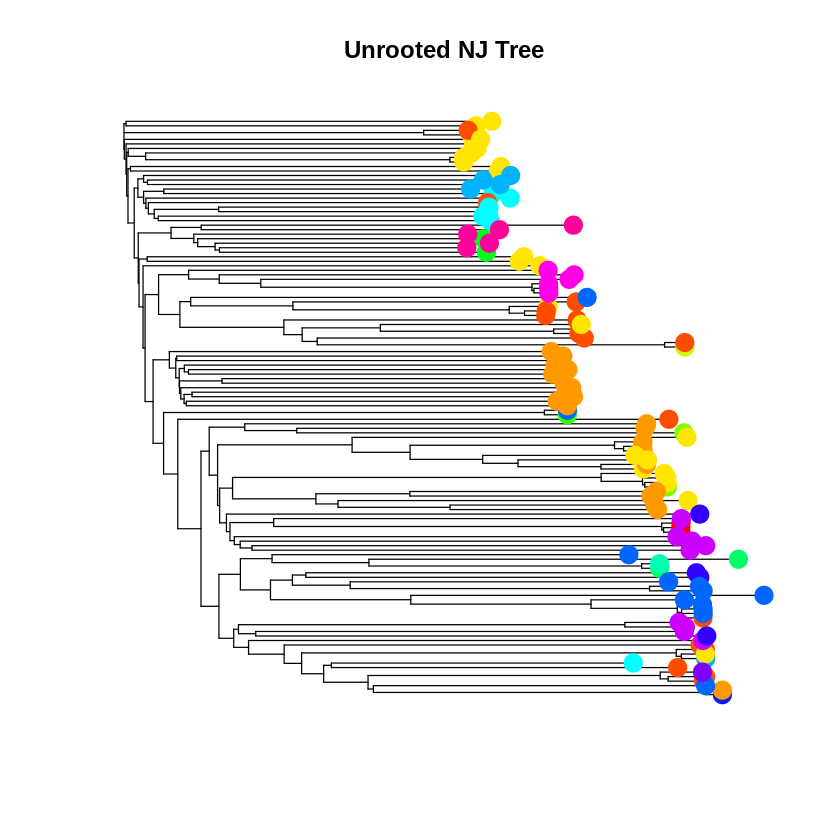

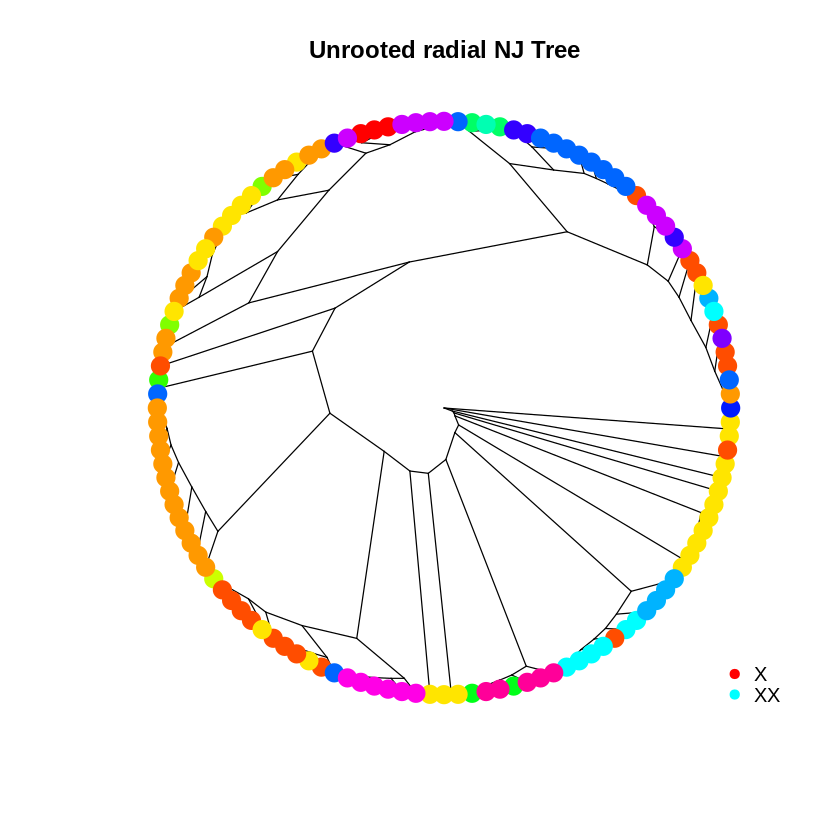

In [35]:
tre <- ladderize(tre)
plot(tre,show.tip.lab = FALSE)
tiplabels(col = myCol, pch = 19, cex=2)
title("Unrooted NJ Tree")
#legend("bottomright", pch = 19, col=rainbow(2, alpha = 1), 
#           legend = c("PRPG", "TOPA"), 
#           cex=2, bty="n",y.intersp=0.8, ncol=2)


plot(tre, type = "radial" , show.tip.lab = FALSE)
tiplabels(col = myCol, pch = 19, cex=2)
title("Unrooted radial NJ Tree")
legend("bottomright", pch = 19, col=rainbow(2, alpha = 1), legend = c("X", "XX"), cex=1, bty="n",y.intersp=0.8)

"average method" is used for UPGMA, members can be equal to NULL or a vector with a length of size D

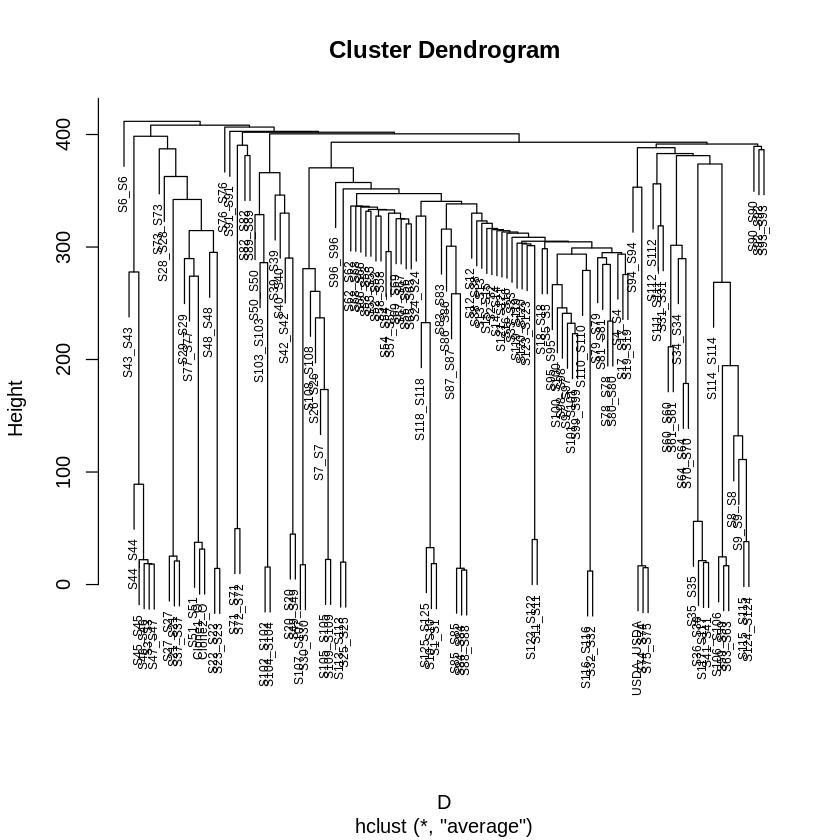

In [36]:
h_cluster <- hclust(D, method = "average", members = NULL)
plot(h_cluster, cex = 0.6)

## $F_{ST}$ calculations

In [37]:
Myzus.fst.nei = genet.dist(Myzus.genind,method="Nei87")
Myzus.fst.nei

## Distance methods





\begin{array}{rr} \hline
 Method & Function & Assumption & Euclidean \\ \hline
    Prevosti 1975 & prevosti.dist, diss.dist & — & No \\ 
    Nei, 1972, 1978 & nei.dist & Infinite Alleles,
Genetic Drift &  No\\ 
    Edwards, 1971 & edwards.dist & Genetic Drift & Yes \\ 
    Reynolds, 1983 & reynolds.dist & Genetic Drift & Yes \\ 
    Rogers, 1972 & rogers.dist & — &  Yes \\ 
    Bruvo, 2004 & bruvo.dist & Step-wise Mutation &  No \\
\end{array}



### Simple distance (number of loci that differ)
This function computes a matrix of distances between pairs of individuals from a matrix or a data frame of genetic data. See **?dist.gene** for details about methods of this distance.

In the case of the **pairwise method**, the distance $d$ between two individuals is the number of loci for which they differ, and the associated variance is $d(L-d)/L$, where $L$ is the number of loci.

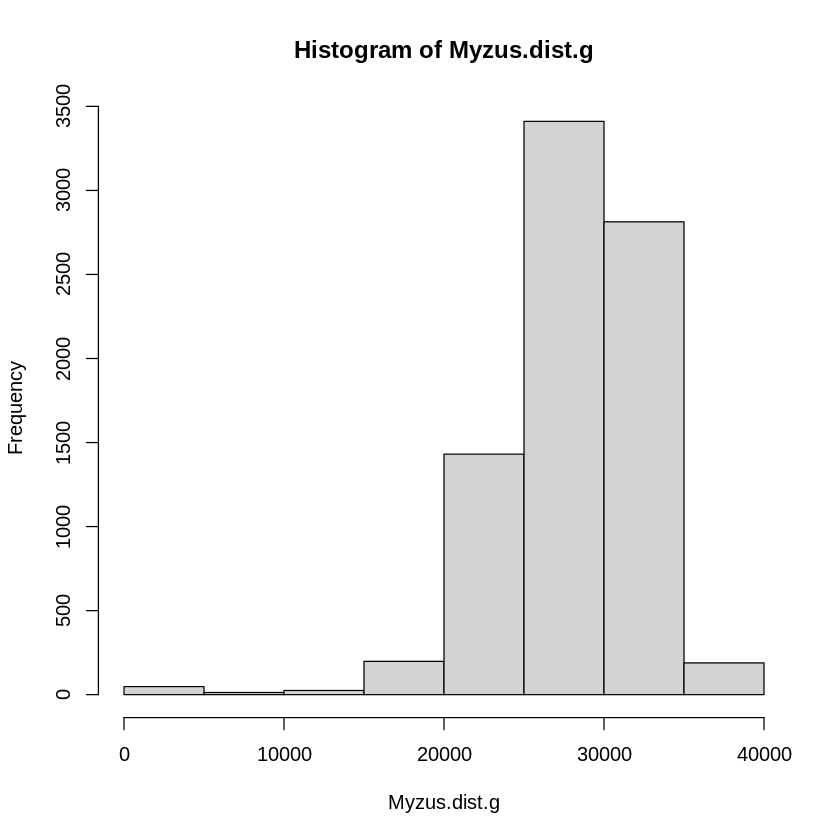

In [60]:
Myzus.dist.g <- dist.gene(x=Myzus.genind@tab, method="pairwise") 
hist(Myzus.dist.g)

### Euclidean distance 

The function **dist** is more flexible and allows different methods for the distance matrix computation including "euclidean", "maximum", "manhattan", "canberra", "binary" or "minkowski". 

**Euclidean** is one of the most often used and is calculated by estimating the distance between two vectors of containing allelic frequencies of two paired samples 

<p>&nbsp;</p>

\begin{split}
\sqrt{\sum_i(x_i - y_i)^2}
\end{split}
<p>&nbsp;</p>

In [61]:
Myzus.genind$tab[1:2,1:6]

1:8313.0 1:8313.1 1:45838.0 1:45838.1 1:50354.0 1:50354.1
USDA_USDA 2        0        2         0         2         0        
S105_S105 2        0        1         1         2         0

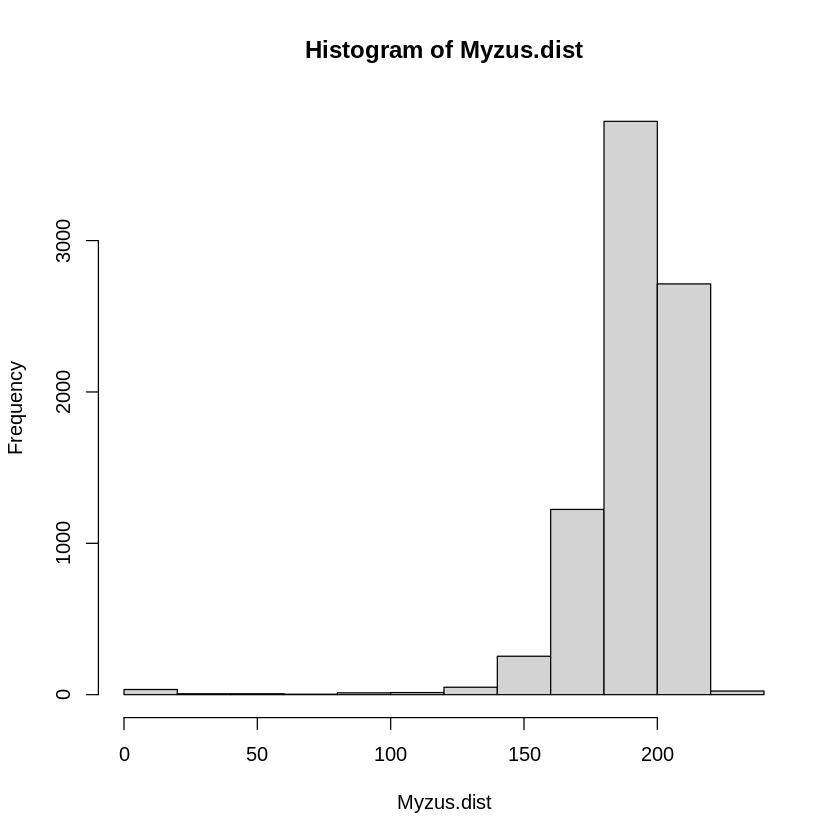

In [62]:
# Euclidean distance for individuals (plain ordinary distance matrix)
Myzus.dist <- dist(x=Myzus.genind, method="euclidean", diag=T, upper=T)
hist(Myzus.dist)

### Nei's distance (not Euclidean) for populations

**dist.genpop** is a function computes measures of genetic distances between populations using a genpop object. Other methods are available, see **?dist.genpop**. First, we must transform our genind object to genpop.


In [63]:
Myzus.genpop <- genind2genpop(Myzus.genind, process.other=TRUE)


 Converting data from a genind to a genpop object... 

...done.



In [102]:
#Nei's distance 
Myzus.dist.pop <- round(dist.genpop(x=Myzus.genpop, method=1, diag=TRUE, upper=FALSE),2)
Myzus.dist.pop

              US   UK Greece Italy Germany Zimbabwe Japan Algeria Belarus
US          0.00                                                         
UK          0.11 0.00                                                    
Greece      0.10 0.03   0.00                                             
Italy       0.10 0.02   0.02  0.00                                       
Germany     0.19 0.07   0.13  0.12    0.00                               
Zimbabwe    0.11 0.07   0.05  0.05    0.15     0.00                      
Japan       0.16 0.08   0.08  0.07    0.18     0.12  0.00                
Algeria     0.15 0.05   0.06  0.04    0.16     0.12  0.10    0.00        
Belarus     0.15 0.07   0.09  0.08    0.15     0.12  0.14    0.12    0.00
Armenia     0.17 0.09   0.10  0.09    0.16     0.13  0.15    0.13    0.02
Spain       0.13 0.03   0.04  0.02    0.15     0.09  0.08    0.04    0.10
France      0.12 0.03   0.03  0.02    0.14     0.09  0.08    0.05    0.09
Australia   0.10 0.03   0.04  0.04    

In [65]:
# Turn to be Euclidean
Myzus.dist.pop <- cailliez(distmat=Myzus.dist.pop, print=FALSE,tol=1e-07, cor.zero=TRUE)

* returns a logical value indicating if all the eigenvalues are positive or equal to zero

In [66]:
# Test if it is Euclidean
is.euclid(Myzus.dist.pop, plot=FALSE, print=TRUE, tol=1e-10) 

 [1]  6.955194e-02  5.658692e-02  4.622089e-02  4.487527e-02  2.761989e-02
 [6]  2.131786e-02  2.033036e-02  1.674574e-02  1.350606e-02  1.059860e-02
[11]  9.049704e-03  8.739313e-03  8.422348e-03  8.010230e-03  6.946678e-03
[16]  6.544887e-03  6.071487e-03  1.679970e-17 -1.886022e-17


[1] TRUE

## Dissimilarity matrix

Careful with this distance! Missing values can create some biases. 

In [67]:
# Dissimilarity matrix returns a distance reflecting the number of allelic differences between two individuals
Myzus.dist.diss <- diss.dist(x=Myzus.genind, percent=FALSE, mat=TRUE)

  [1]  2.562989e+09  1.389213e+09  9.183878e+08  8.239620e+08  7.211567e+08
  [6]  5.930414e+08  5.416394e+08  4.683909e+08  4.089384e+08  3.798283e+08
 [11]  3.495300e+08  3.212143e+08  2.832295e+08  2.542049e+08  2.415683e+08
 [16]  1.998723e+08  1.836328e+08  1.645333e+08  1.463517e+08  1.378893e+08
 [21]  1.376861e+08  1.297929e+08  1.284330e+08  1.190420e+08  1.186314e+08
 [26]  1.142488e+08  1.118963e+08  1.109739e+08  1.087349e+08  1.073594e+08
 [31]  1.043352e+08  1.005082e+08  9.585239e+07  9.494344e+07  9.336592e+07
 [36]  9.054078e+07  9.041066e+07  8.864644e+07  8.518033e+07  8.472381e+07
 [41]  8.216344e+07  8.013896e+07  7.887129e+07  7.806081e+07  7.740295e+07
 [46]  7.614477e+07  7.504855e+07  7.331603e+07  7.286033e+07  7.147833e+07
 [51]  7.047733e+07  6.914926e+07  6.783393e+07  6.609610e+07  6.516157e+07
 [56]  6.451739e+07  6.420059e+07  6.189157e+07  6.156559e+07  6.027556e+07
 [61]  5.930419e+07  5.880008e+07  5.812261e+07  5.762099e+07  5.624092e+07
 [66]  5.511

[1] FALSE

USDA_USDA S105_S105 S106_S106 Clone1_O Clone2_O S116_S116 S107_S107
USDA_USDA     0     17356     15256     16639    16667    17386     18131    
S105_S105 17356         0     16724     17519    17539    13618     10015    
S106_S106 15256     16724         0     17093    17115    16518     18203    
Clone1_O  16639     17519     17093         0       86    18067     17770    
Clone2_O  16667     17539     17115        86        0    18083     17798    
S116_S116 17386     13618     16518     18067    18083        0     18327    
          S108_S108 S109_S109 S110_S110 ⋯ S91_S91 S92_S92 S93_S93 S94_S94
USDA_USDA 17313     17373     17408     ⋯ 15524   15011   15137   13110  
S105_S105  7683        41     13628     ⋯ 16918   17139   17661   16634  
S106_S106 16757     16741     16614     ⋯ 15552   15411   15733   15274  
Clone1_O  17500     17540     18177     ⋯ 16781   16540   16572   16671  
Clone2_O  17528     17560     18187     ⋯ 16801   16584   16608   16705  
S116_S116 13471     13633      9374     ⋯ 17022   17349   18703   16842  
          S95_S95 S96_S96 S97_S97 S98_S98 S99_S99 S9_S9
USDA_USDA 17142   18042   17508   16719   17030   15024
S105_S105 13382   14726   13138   12891   12818   16798
S106_S106 16382   16598   16602   15735   16250    4736
Clone1_O  17807   18503   17997   17388   17691   16987
Clone2_O  17831   18533   18023   17412   17717   17017
S116_S116 11176   14428   11166   10527   10328   16916

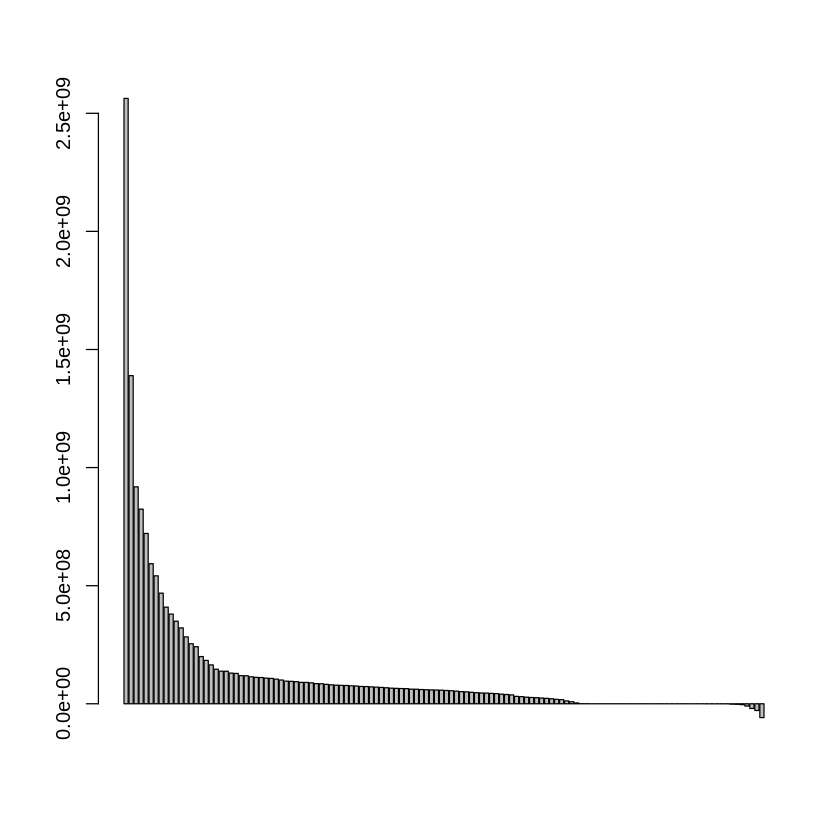

In [68]:
is.euclid(as.dist(Myzus.dist.diss), plot=TRUE, print=TRUE, tol=1e-10)
head(Myzus.dist.diss)

In [69]:
# Compare different distance matrices
# List of functions to be parsed to respective dist.* function
distances <- c("Nei", "Rogers", "Edwards", "Reynolds", "Prevosti")
Myzus.genind.cor <- missingno(pop=Myzus.genind, type="mean",cutoff=0.1, quiet=FALSE)


 No missing values detected.




In [70]:
# Calculate the distance matrices
dists <- lapply(distances, function(x) {
      DISTFUN <- match.fun(paste(tolower(x), "dist", sep="."))   
      DISTFUN(Myzus.genind.cor) 
    }
)

In [71]:
# Add names for the distance names
names(dists) <- distances

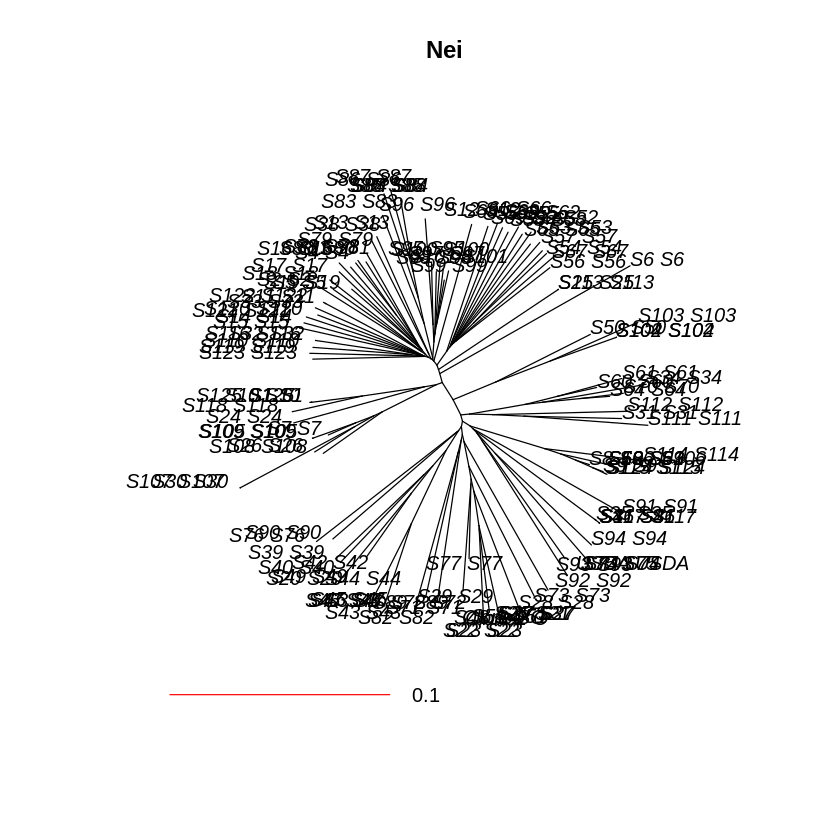

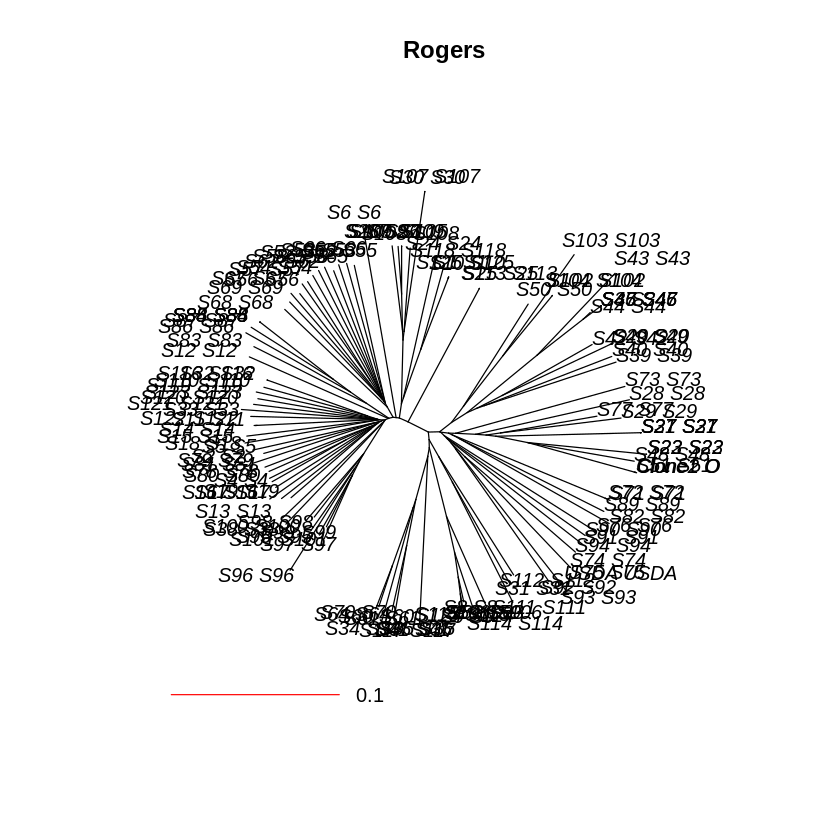

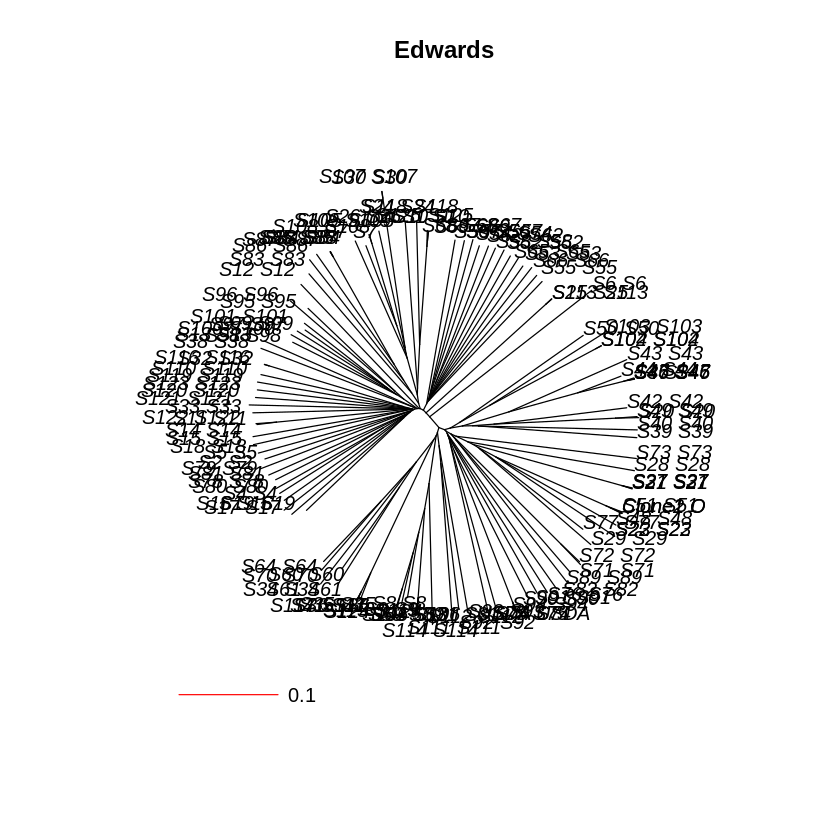

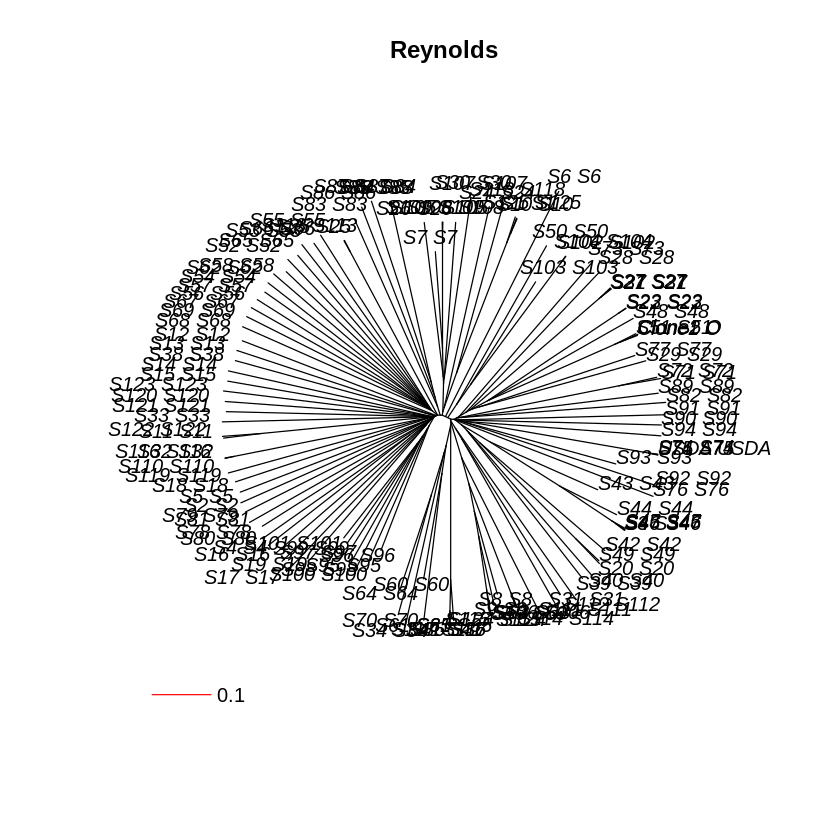

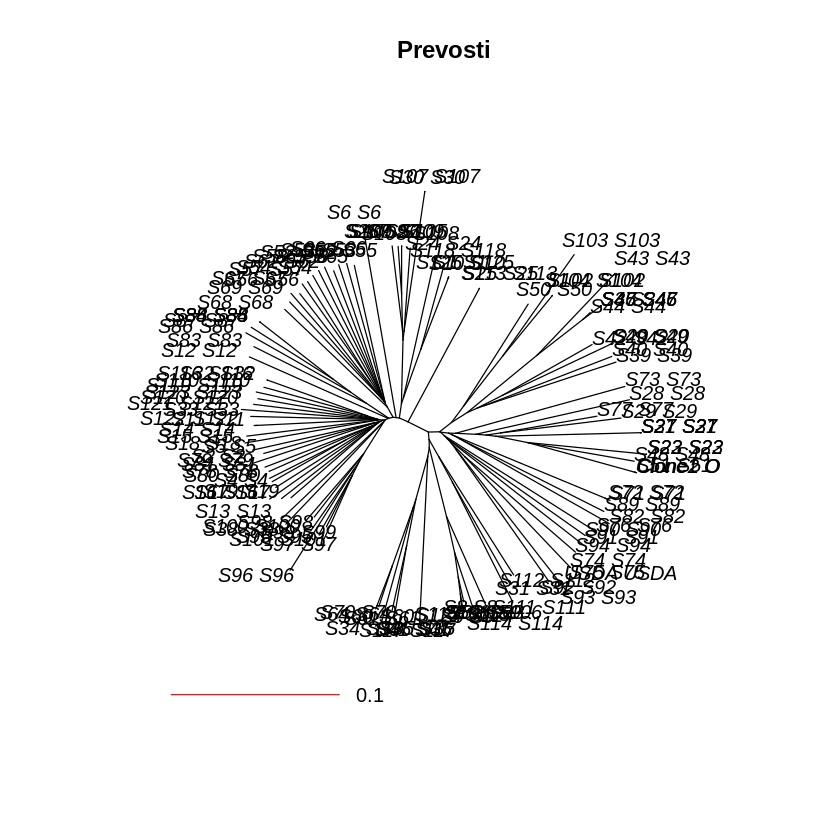

In [72]:
# Calculate NJ and plot all trees

x <- lapply(names(dists), function(x) {
    plot(njs(dists[[x]]), main=x, type="unrooted")
    add.scale.bar(lcol="red", length=0.1) })

## Overlapping the trees from subsetting random variants

In [103]:
# subsets
Myzus.variant.subset <- vector(mode = "list", length = 50)

# 50 subsets of 200 random variants 
for (i in 1:50){
  Myzus.variant.subset[[i]] <- Myzus.prune[sample(size = 200, x= c(1:nrow(Myzus.prune)))]
}

# Checking we have 50 vcfR objects:
length(Myzus.variant.subset)

[1] 50

In [105]:
# Creating the GenLight object
Myzus.gl.subset <- lapply(Myzus.variant.subset, function (x) suppressWarnings(vcfR2genlight(x)))
for (i in 1:length(Myzus.gl.subset)){
  ploidy(Myzus.gl.subset[[i]]) <- 2
}

In [106]:
# Creating a simple UPGMA tree per object
library(phangorn)
Myzus.trees <- lapply(Myzus.gl.subset, function (x) upgma(bitwise.dist(x)))
class(Myzus.trees) <- "multiPhylo"

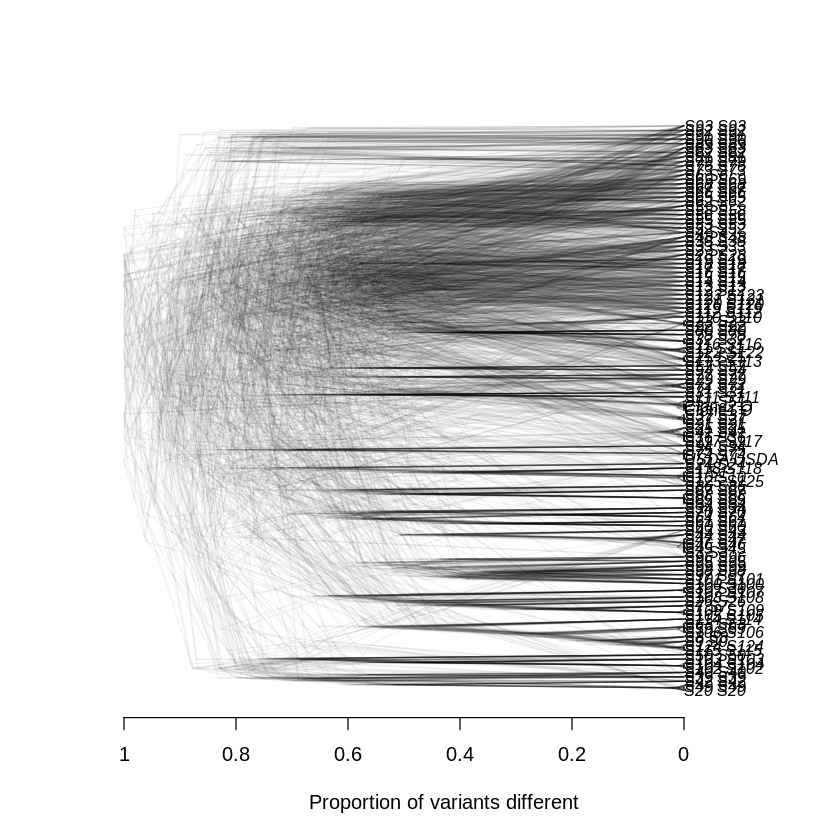

In [113]:
# Overlapping the trees
densiTree(Myzus.trees, alpha = 0.05, scaleX = T, show.tip.label = F)
title(xlab = "Proportion of variants different")

## Visualize pairwise genetic similarities

* table.paint() requires data
* frame, dist can't be directly
* converted to DF
 
 
* Same visualization, colored
* heatmap() reorders values
* because by default it plots
* also dendrograms on the edges

In [73]:
# Transforming genlight file
Myzus.dists.l <- seploc(Myzus.genlight , n.block=10, parallel=FALSE)
class(Myzus.dists.l)

[1] "list"

In [74]:
Myzus.dists <- lapply(X=Myzus.dists.l, FUN=function(DDD)
   
dist(as.matrix(DDD)))
class(Myzus.dists)
names(Myzus.dists)
class(Myzus.dists[[1]])

[1] "list"

[1] "block.1"  "block.2"  "block.3"  "block.4"  "block.5"  "block.6" 
 [7] "block.7"  "block.8"  "block.9"  "block.10"

[1] "dist"

[1] "dist"

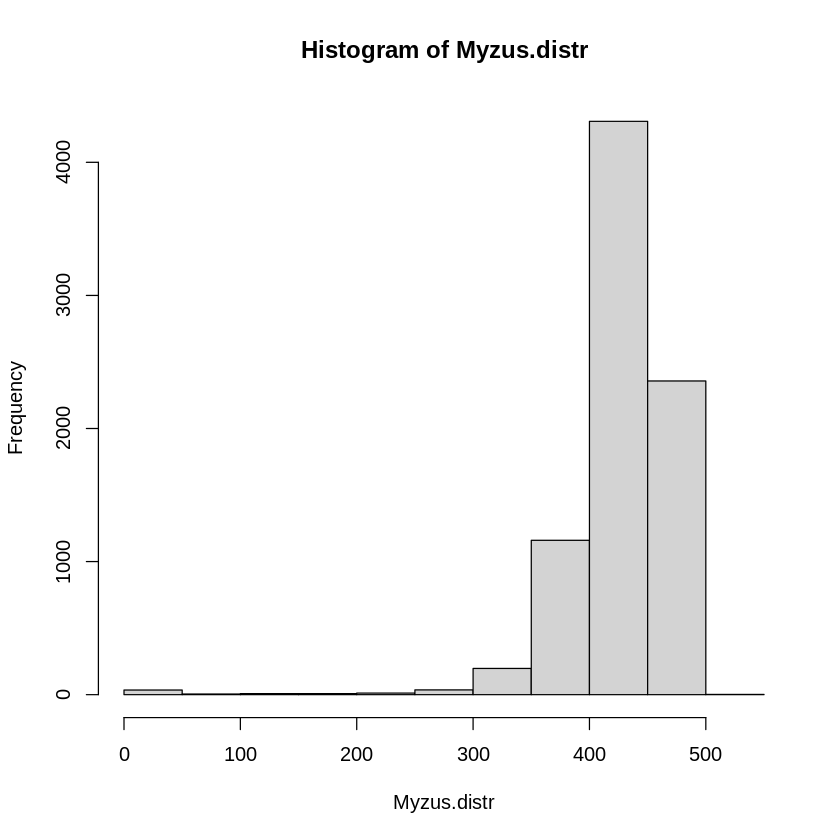

In [75]:
Myzus.distr <- Reduce(f="+", x=Myzus.dists)
class(Myzus.distr )
hist(Myzus.distr) 

In [76]:
# It is possible to use just basic dist function on whole
# genlight object (might require a lot of RAM)
Myzus.distg <- dist(as.matrix(Myzus.genlight))

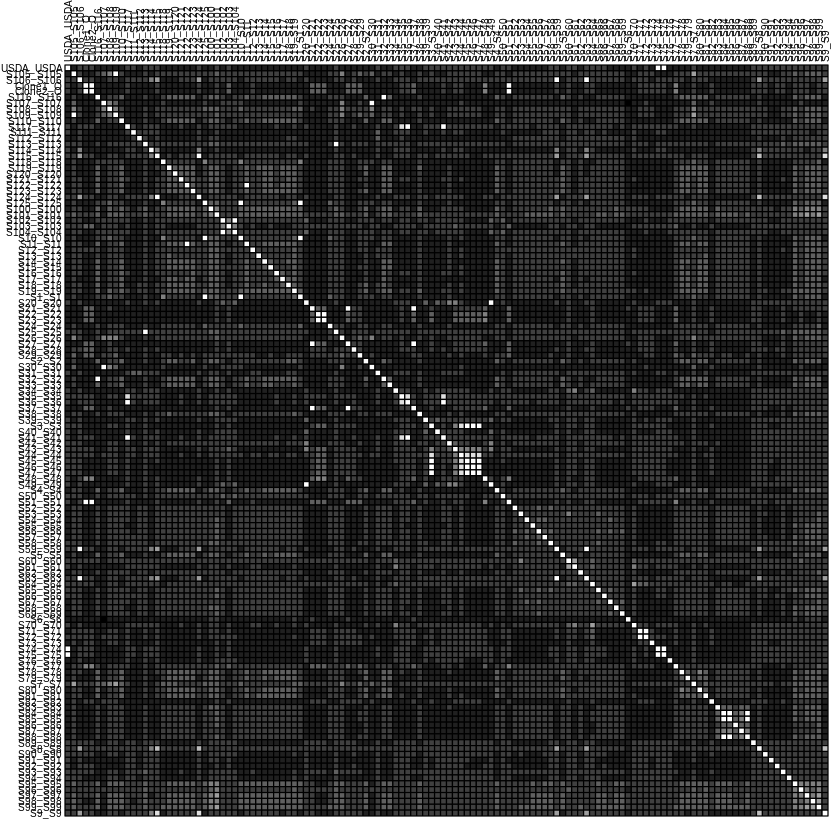

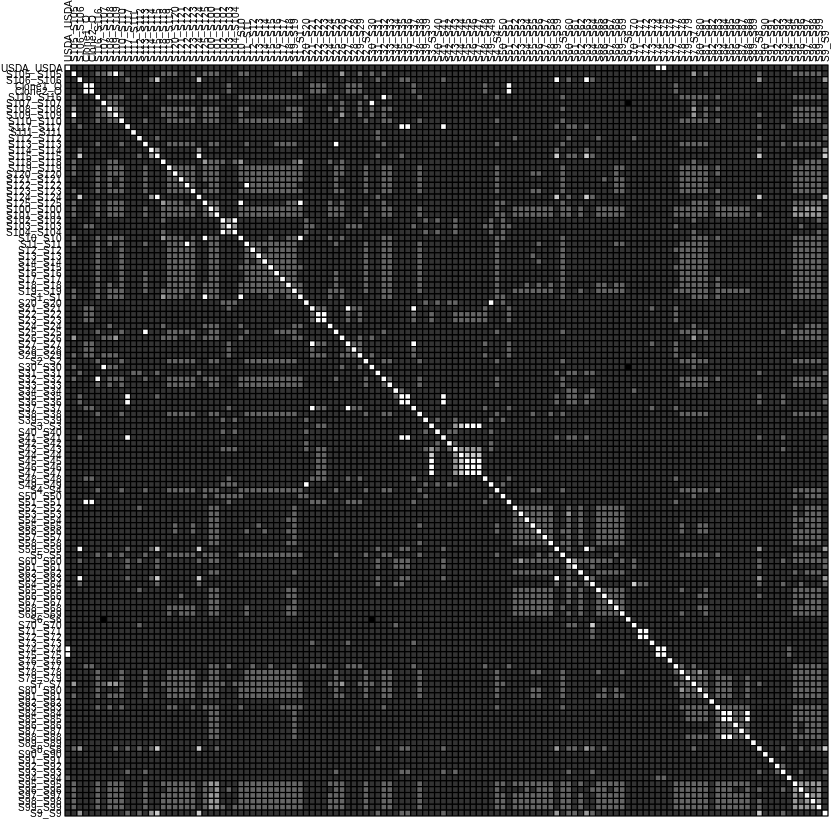

In [77]:
table.paint(df=as.data.frame(as.matrix(Myzus.distg)), cleg=0, clabel.row=0.5, clabel.col=0.5)

table.paint(df=as.data.frame(as.matrix(Myzus.distr)), cleg=0, clabel.row=0.5, clabel.col=0.5)

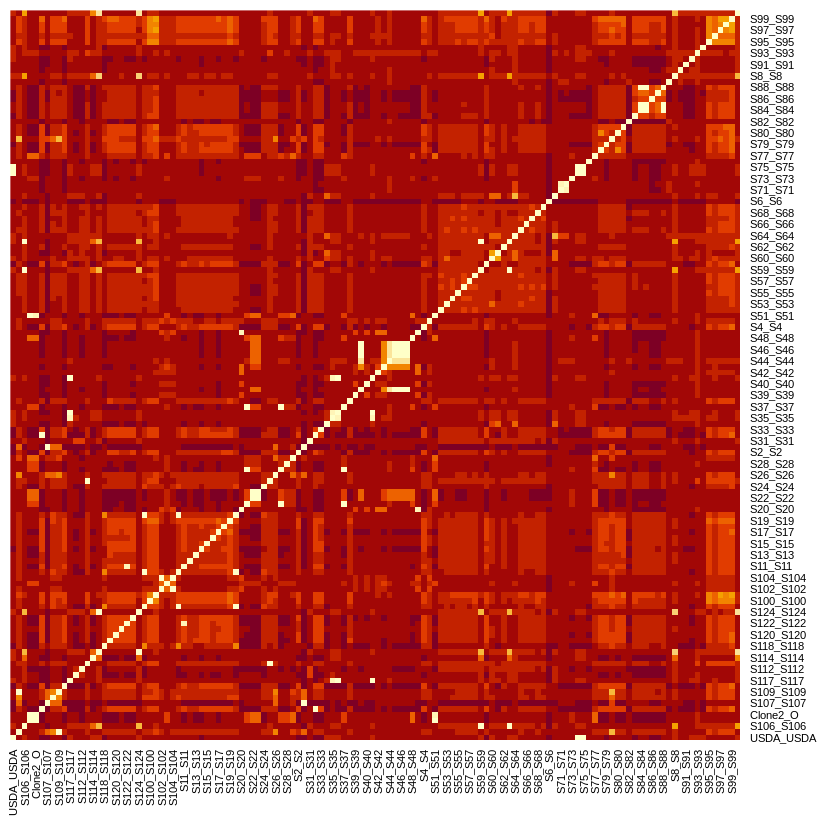

In [78]:
heatmap(x=as.matrix(Myzus.distg), Rowv=NA, Colv=NA, symm=TRUE)
#heatmap(x=as.matrix(Myzus.distr), Rowv=NA, Colv=NA, symm=TRUE)

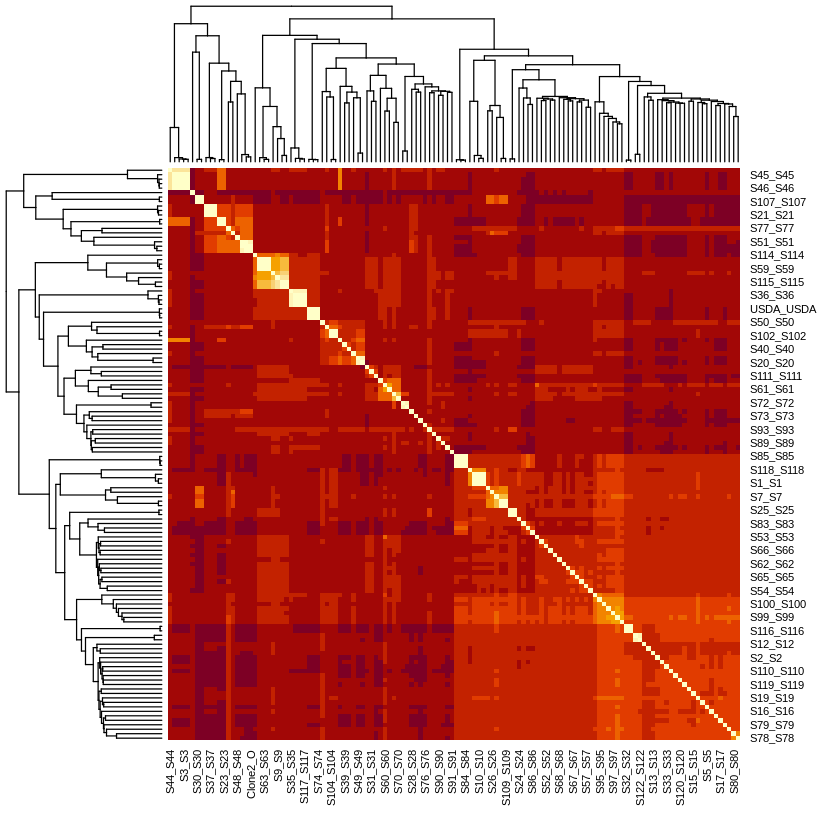

In [79]:
heatmap(as.matrix(Myzus.distg), symm=TRUE, labRow=rownames(as.matrix(Myzus.distg)), 
        labCol=colnames(as.matrix(Myzus.distg)))


# By populations
heatmap(as.matrix(Myzus.distg), symm=TRUE)

## AMOVA I


• Analysis of molecular variance tests if there are significant differences
among populations (and/or another levels)

• Some implementations can partition variance into various levels pegas::amova returns a table of sums of square deviations (SSD), mean square deviations (MSD), and the number of degrees of freedom (df), and a vector of variance components (sigma2)

• See sigma2 column for how much of the variance is on which level—percentage can be calculated as percentage of each level from total

• For more complicated hierarchy see ?poppr::poppr.amova

• For mixed-ploidy dat sets see ?StAMPP::stamppAmova

In [80]:
Myzus.pop <- pop(Myzus.genind)

Myzus.amova <- pegas::amova(Myzus.distg ~ Myzus.pop, data=NULL, nperm=1000, is.squared=TRUE)
Myzus.amova


	Analysis of Molecular Variance

Call: pegas::amova(formula = Myzus.distg ~ Myzus.pop, data = NULL, 
    nperm = 1000, is.squared = TRUE)

               SSD       MSD  df
Myzus.pop 1972.171 109.56507  18
Error     6588.929  60.44889 109
Total     8561.100  67.41024 127

Variance components:
           sigma2 P.value
Myzus.pop  7.8087       0
Error     60.4489        

Phi-statistics:
Myzus.pop.in.GLOBAL 
          0.1144005 

Variance coefficients:
       a 
6.289931 


## Minimum Spanning Network

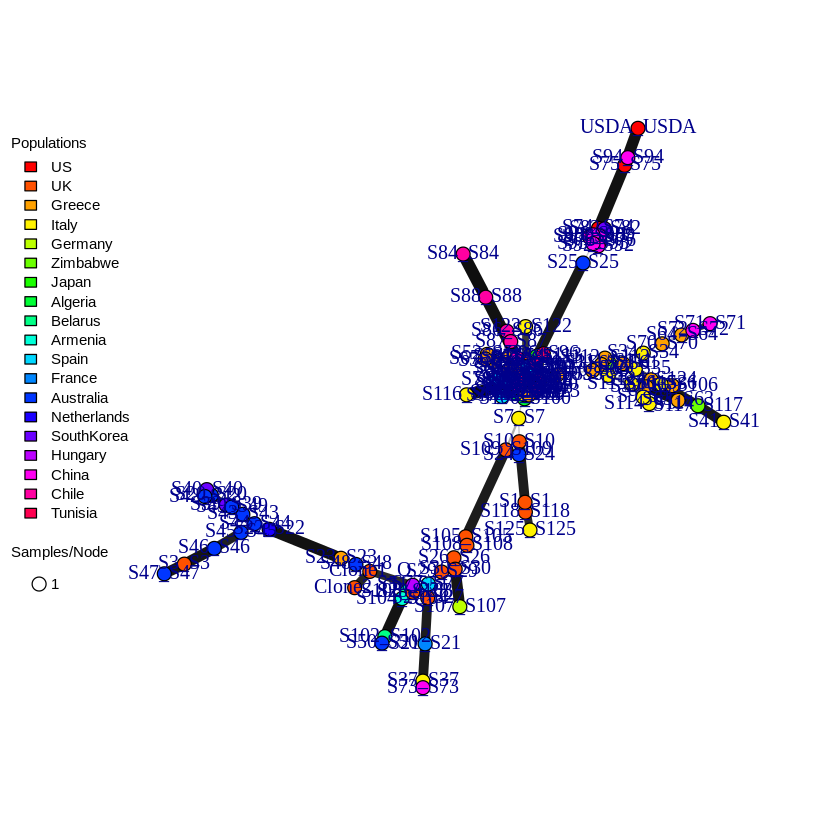

In [85]:
Myzus.msn<- poppr.msn(gid= Myzus.genind, 
                  distmat = Myzus.distg, 
                  replen=rep(2, 12), 
                  loss=TRUE, 
                  palette=rainbow, 
                  vertex.label ="inds",  
                  gscale=TRUE, 
                  wscale=TRUE, 
                  showplot=TRUE,
                  nodebase = 1.25)

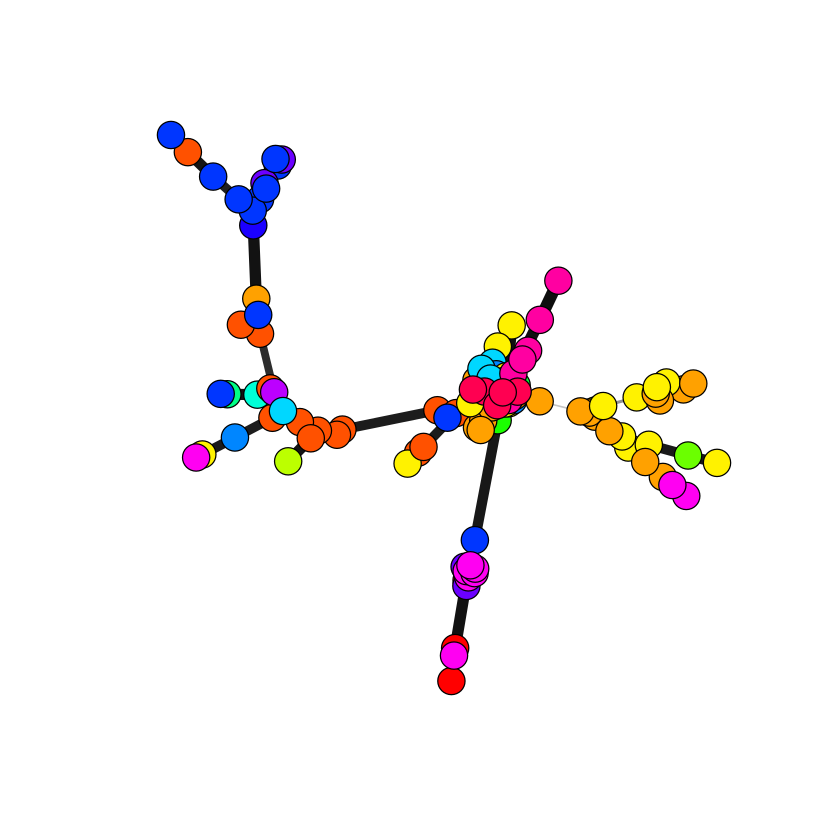

In [87]:
edge_weight <- E(Myzus.msn$graph)$weight
edge_labels <- ifelse(edge_weight < 0.15, round(edge_weight, 3), NA)

#plot.igraph(Myzus.msn$graph, edge.label = edge_labels, vertex.size = 15, edge.label.color = "red")
plot.igraph(Myzus.msn$graph,
            edge.label = edge_labels, 
            vertex.size = 10, 
            edge.label.color = "red",
            labels = NULL,
            vertex.label = NA,
            label.font = NULL,
            edge.arrow.size = .2)

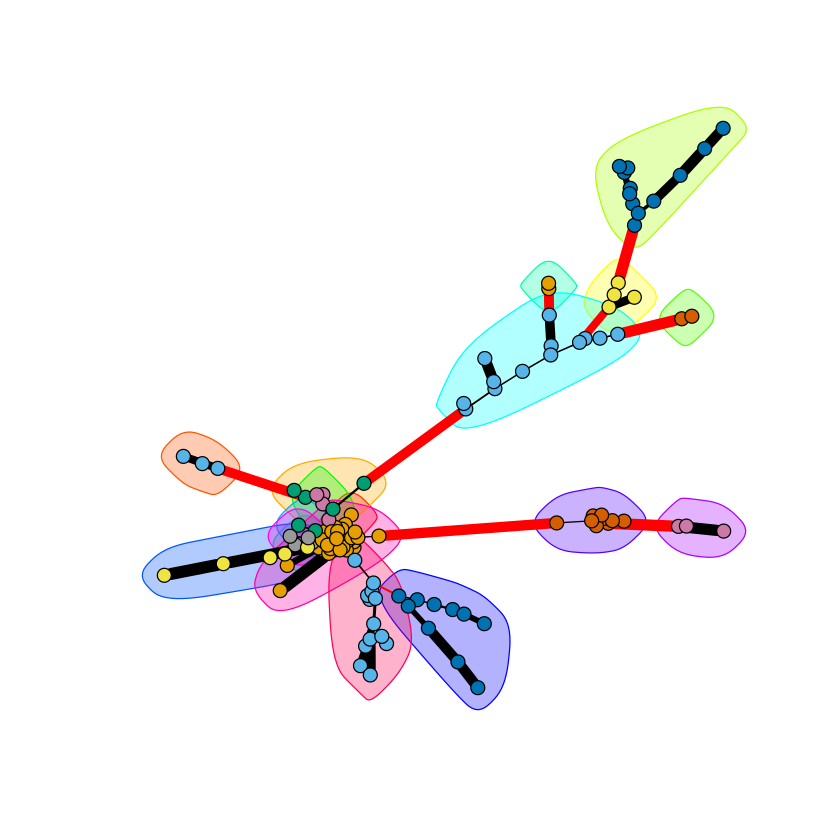

In [88]:
# Louvain
lou <- cluster_louvain(Myzus.msn$graph)
#membership(lou)
#communities(lou)

plot(lou, Myzus.msn$graph, vertex.label = NA, vertex.size=5, edge.arrow.size = .2)

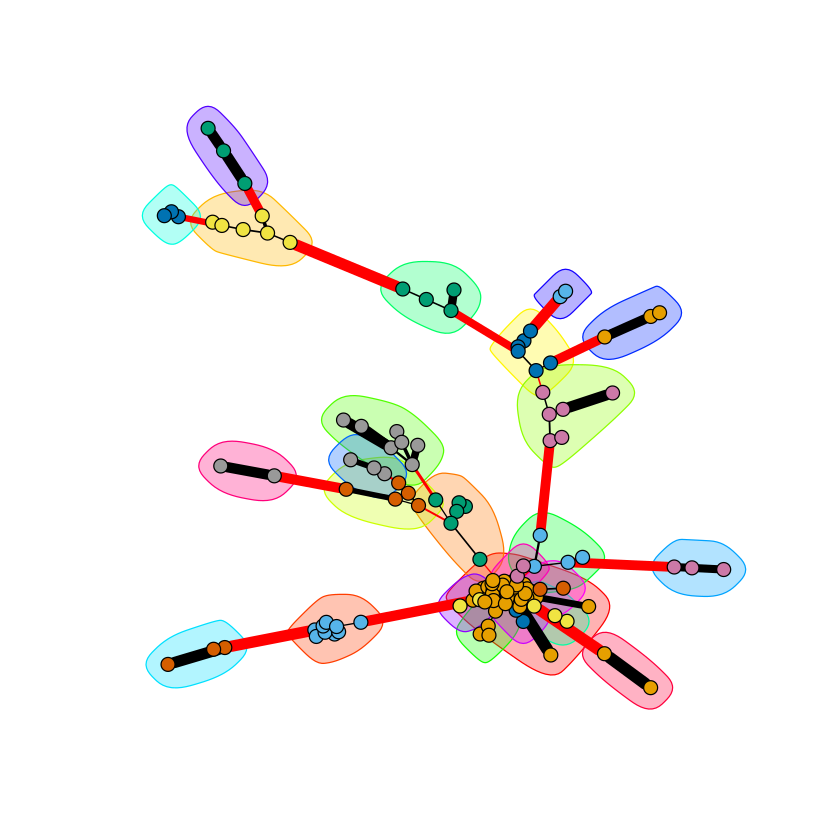

In [89]:
# Infomap
inf <- cluster_infomap(Myzus.msn$graph)
#membership(inf)
#communities(inf)

plot(inf, Myzus.msn$graph, vertex.label = NA, vertex.size=5, edge.arrow.size = .2)

Warning message in cluster_edge_betweenness(g):
“At community.c:460 :Membership vector will be selected based on the lowest modularity score.”
Warning message in cluster_edge_betweenness(g):
“At community.c:467 :Modularity calculation with weighted edge betweenness community detection might not make sense -- modularity treats edge weights as similarities while edge betwenness treats them as distances”


USDA_USDA S105_S105 S106_S106  Clone1_O  Clone2_O S116_S116 S107_S107 S108_S108 
        1         2         3         4         4         5         2         2 
S109_S109 S110_S110 S117_S117 S111_S111 S112_S112 S113_S113 S114_S114 S115_S115 
        2         5         6         3         3         1         3         3 
S118_S118 S119_S119 S120_S120 S121_S121 S122_S122 S123_S123 S124_S124 S125_S125 
        2         5         5         5         5         5         3         2 
S100_S100 S101_S101 S102_S102 S103_S103 S104_S104   S10_S10   S11_S11   S12_S12 
        5         5         4         4         4         2         5         5 
  S13_S13   S14_S14   S15_S15   S16_S16   S17_S17   S18_S18   S19_S19     S1_S1 
        5         5         5         5         5         5         5         2 
  S20_S20   S21_S21   S22_S22   S23_S23   S24_S24   S25_S25   S26_S26   S27_S27 
        4         2         4         4         2         1         2         2 
  S28_S28   S29_S29     S2_S

Community sizes
 1  2  3  4  5  6  7  8 
13 18 13 22 43 10  4  5 

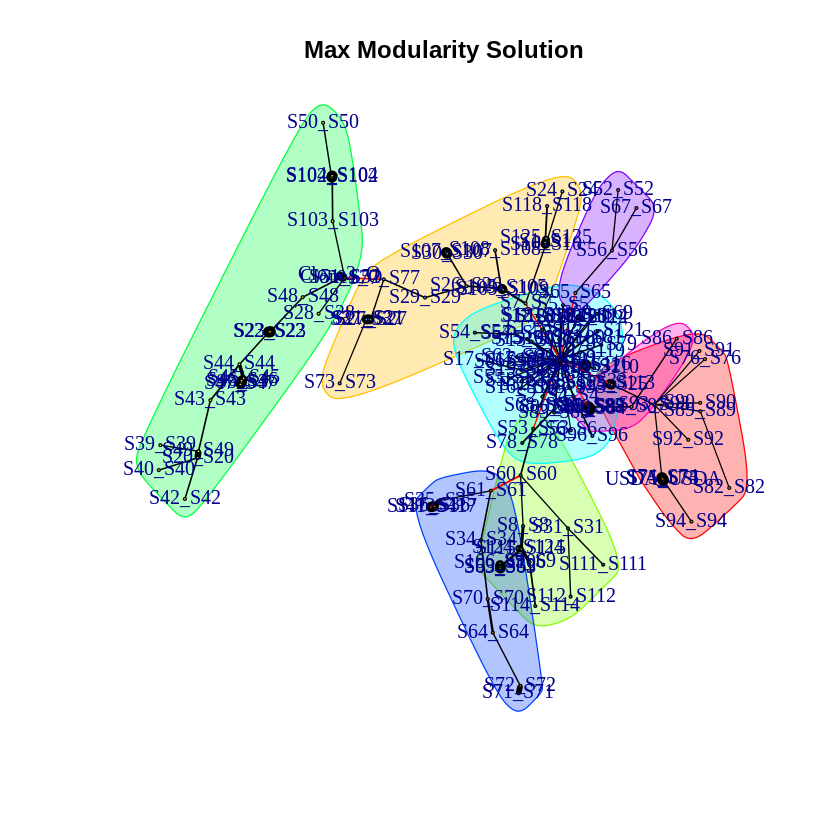

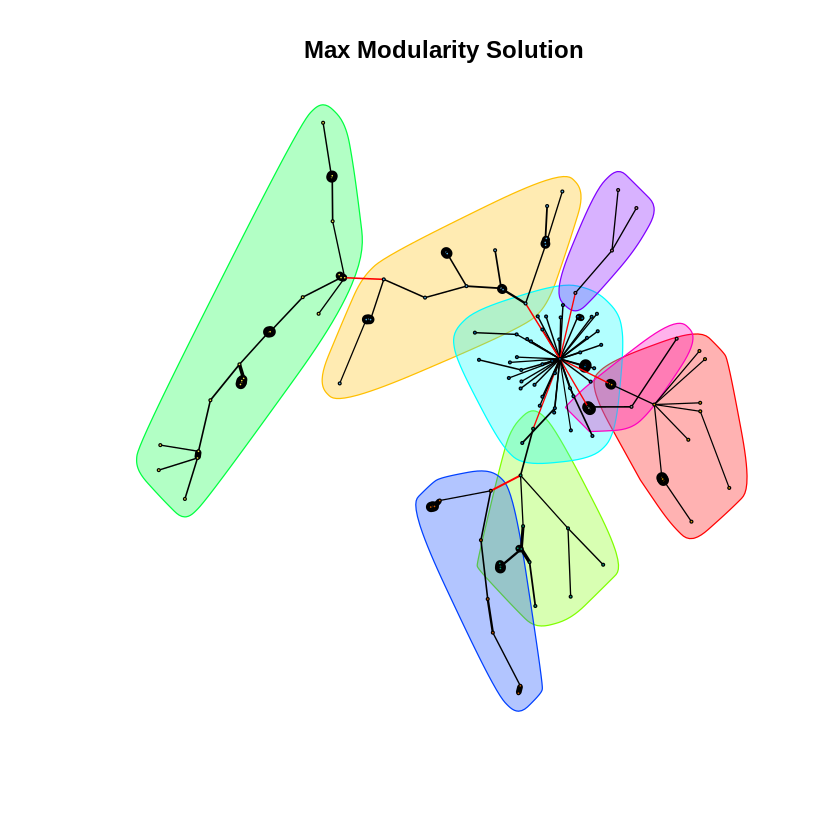

In [90]:
g <- as.undirected(Myzus.msn$graph, mode="collapse")
eb <- cluster_edge_betweenness(g)
membership(eb)
V(g)$group <- membership(eb)
sizes(eb)

plot(eb, g, vertex.label = V(g)$id,  # Uses index number instead of name
     layout = layout_with_kk, 
     main="Max Modularity Solution")

plot(eb, g, vertex.label = NA,
     layout = layout_with_kk, 
     main="Max Modularity Solution")

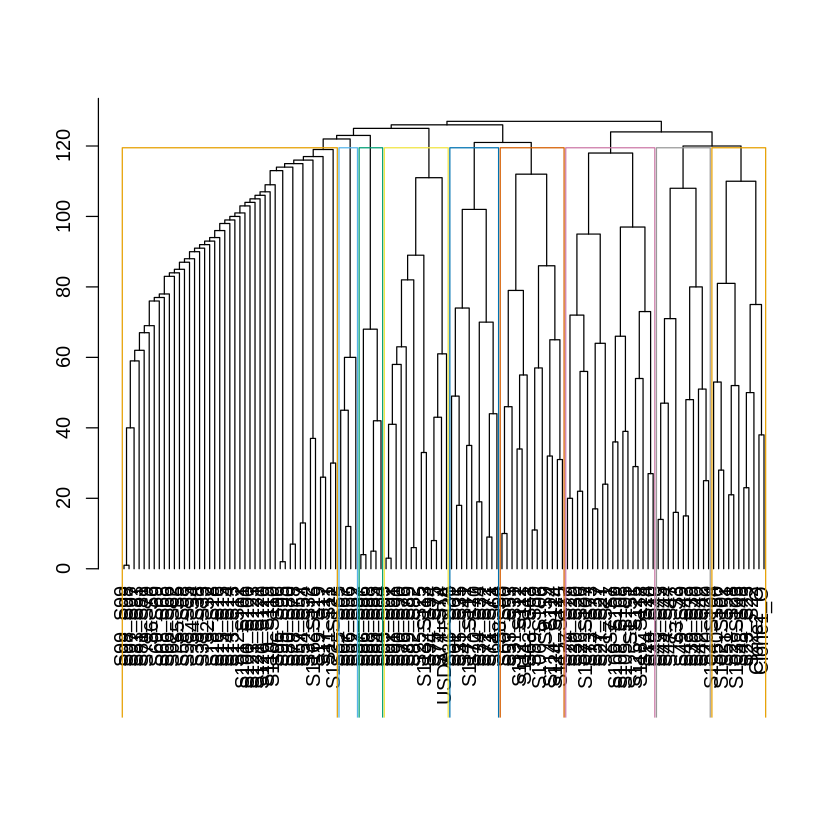

In [92]:
plot_dendrogram(eb, mode="hclust", rect=9)

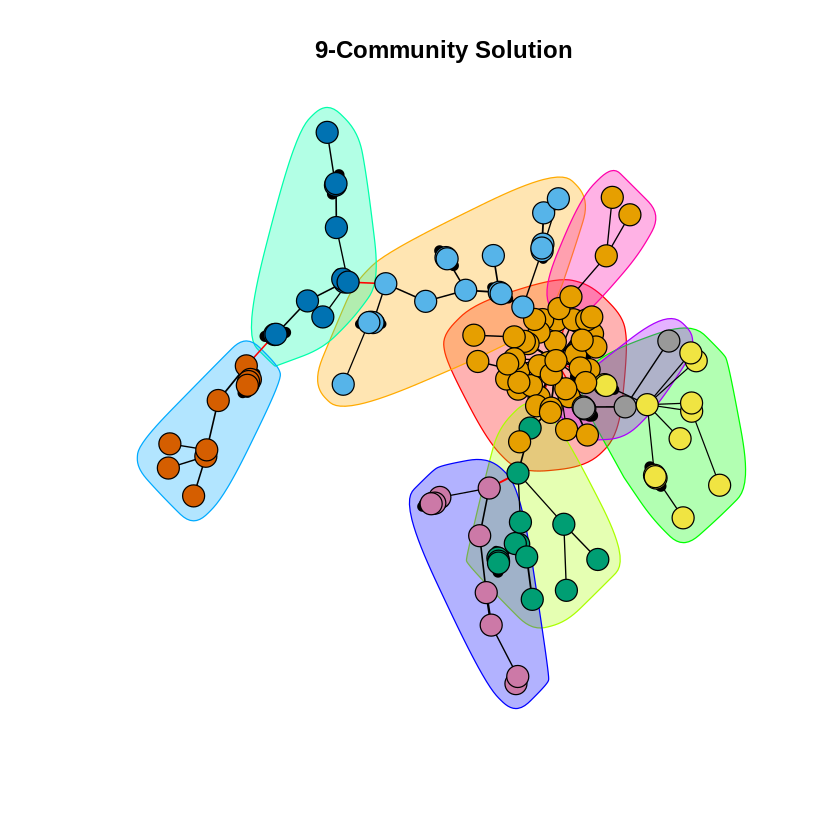

In [94]:
V(g)$group <- membership(eb)

# Change the number of communities in the solution.
eb$membership <- cut_at(eb, 9) # 2 communities

plot(eb, g,   
     layout = layout_with_kk, 
     vertex.label = NA,   
     vertex.size=8, edge.arrow.size = .2,
     main="9-Community Solution")

## TESS

In [142]:

genotype <- Myzus.genind

coord <- read.table("coordinates.txt", header = FALSE, sep = "", dec = ".")
coordinates <- as.matrix(coord)

In [149]:
# Running the tess3 function
tess3.obj <- tess3(X = genotype, coord = coordinates, K = 9,
                   method = "projected.ls", ploidy = 2, rep=1)


== Computing spectral decomposition of graph laplacian matrix: done
==Main loop with 1 threads: done


In [144]:
# Plot error
plot(tess3.obj, pch = 19, col = "blue",
     xlab = "Number of ancestral populations",
     ylab = "Cross-validation score")

Nothing to plot



In [145]:
# Retrieve the Q-matrix for K = 9 clusters
q.matrix <- qmatrix(tess3.obj, K = 9)
brewer.pal(n = 8, name = "Set2")

write.table(q.matrix, "q.matrixK2.txt", row.names=F, quote=F)
colors <- palette(rainbow(8))

[1] "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494"
[8] "#B3B3B3"

Use CreatePalette() to define color palettes.


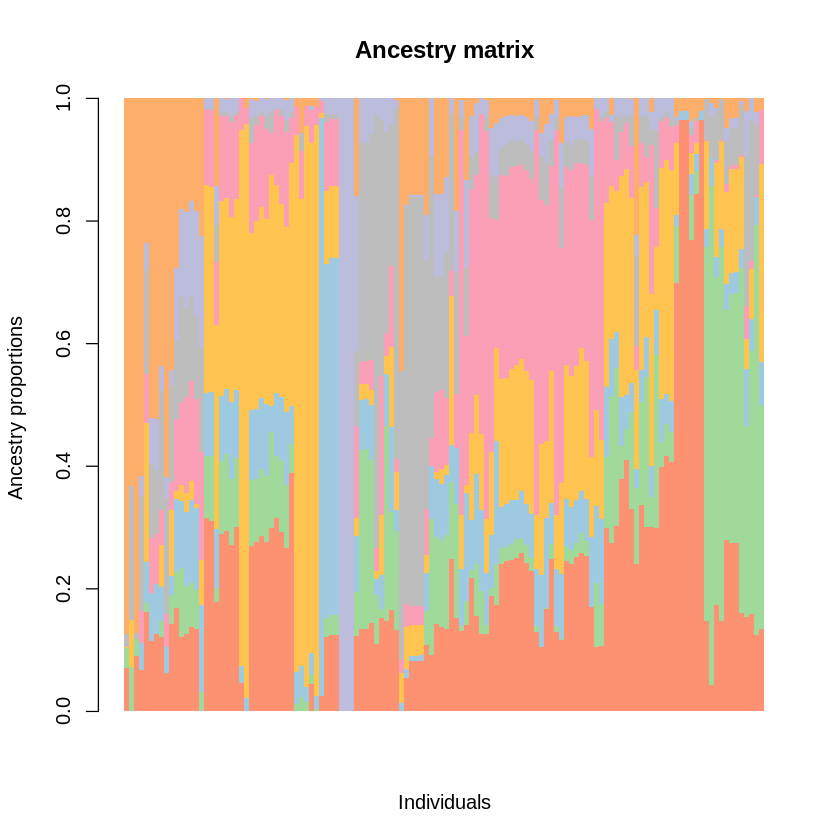

In [146]:
barplot(q.matrix, border = NA, space = 0, 
        xlab = "Individuals", ylab = "Ancestry proportions",
        main = "Ancestry matrix") -> bp

In [147]:
#> Use CreatePalette() to define color palettes.
#axis(1, at = 1:nrow(q.matrix), labels = bp$order, las = 3, cex.axis = .4)

## Spatial interpolation of ancestry coefficient
my.colors <- c("#66C2A5", "#FC8D62", "#8DA0CB", "#E78AC3", "#A6D854", "#FFD92F", "#E5C494", "#B3B3B3")
my.palette <- CreatePalette(my.colors, 8)

Grid searches over lambda (nugget and sill variances) with  minima at the endpoints: 
  (REML) Restricted maximum likelihood 
   minimum at  right endpoint  lambda  =  0.1029642 (eff. df= 18.04971 )
Grid searches over lambda (nugget and sill variances) with  minima at the endpoints: 
  (REML) Restricted maximum likelihood 
   minimum at  right endpoint  lambda  =  0.1029642 (eff. df= 18.04971 )
Grid searches over lambda (nugget and sill variances) with  minima at the endpoints: 
  (REML) Restricted maximum likelihood 
   minimum at  right endpoint  lambda  =  0.1029642 (eff. df= 18.04971 )
Grid searches over lambda (nugget and sill variances) with  minima at the endpoints: 
  (REML) Restricted maximum likelihood 
   minimum at  right endpoint  lambda  =  0.1029642 (eff. df= 18.04971 )
Grid searches over lambda (nugget and sill variances) with  minima at the endpoints: 
  (REML) Restricted maximum likelihood 
   minimum at  right endpoint  lambda  =  0.1029642 (eff. df= 18.04971 )
Grid 

This function required to attach maps namespace.



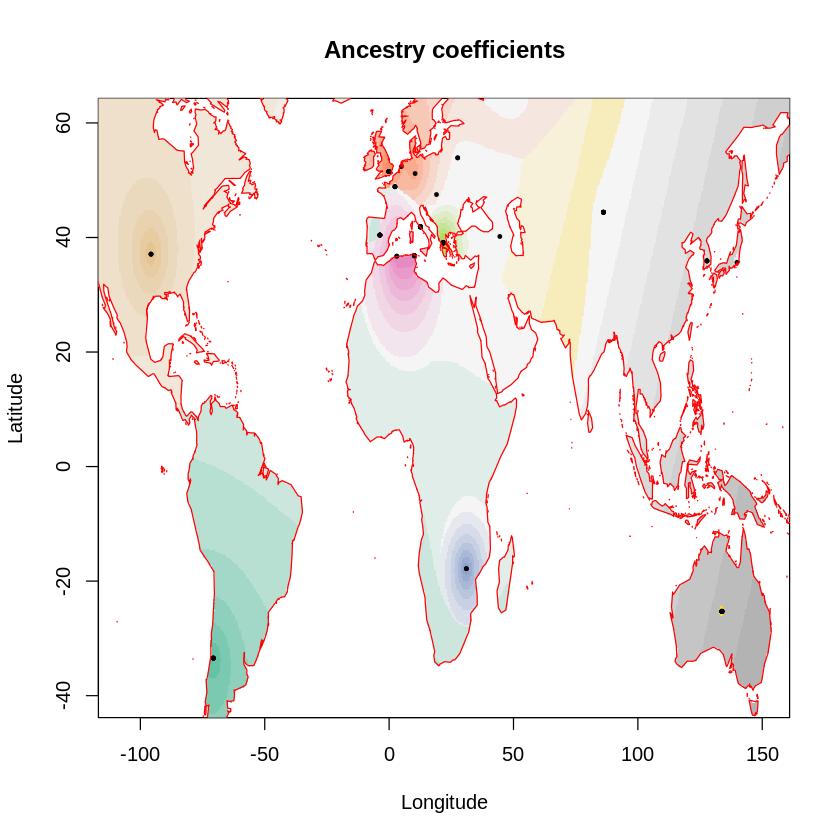

In [150]:
plot(q.matrix, coordinates, method = "map.max", interpol = FieldsKrigModel(9),
     main = "Ancestry coefficients",
     xlab = "Longitude", ylab = "Latitude",
     resolution = c(500,500), cex = .4,
     col.palette = my.palette)

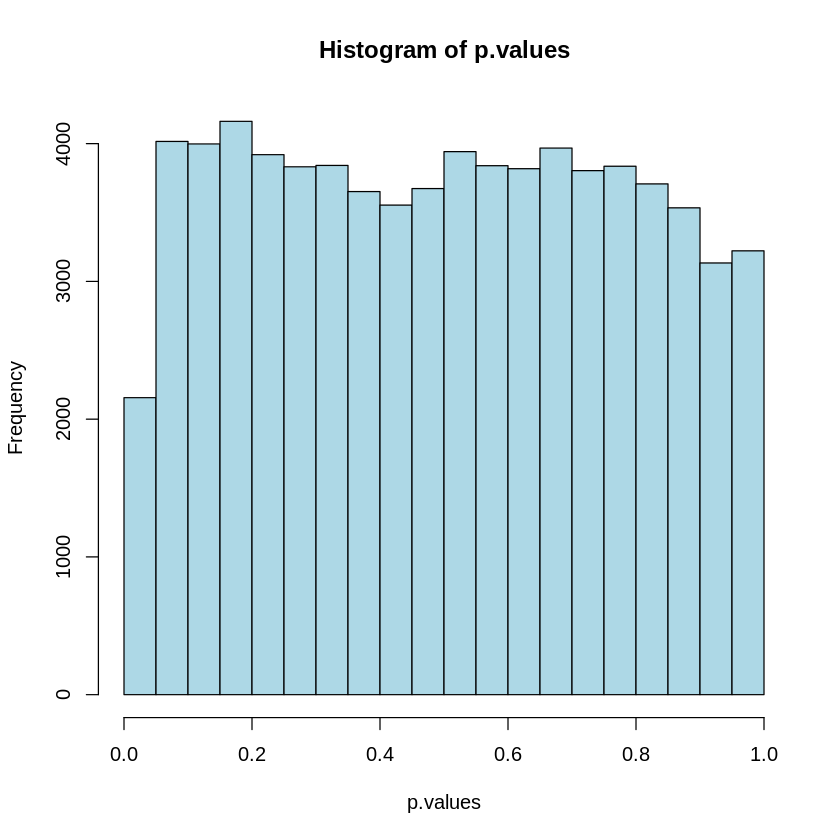

In [151]:
## Genome scan p-values for K = 3
p.values <- pvalue(tess3.obj, K = 9)
hist(p.values, col = "lightblue")

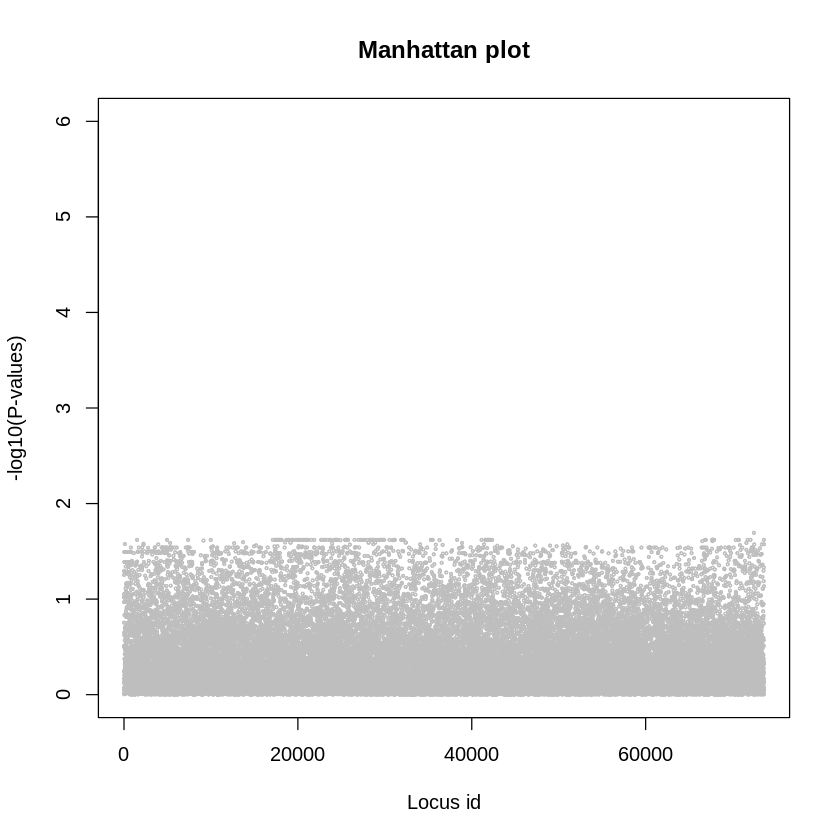

In [141]:
plot(p.values, main = "Manhattan plot",
     xlab = "Locus id",
     ylab = "-log10(P-values)",
     cex = .3, col = "grey", ylim= c(0,6))